                 **PROYECTO DE DATA ANALYTICS  -  TELECOMUNICACIONES (Internet) EN ARGENTINA**
        
        

En este notebook vamos a desarrollar todo el Analisis Exploratorio de Datos (EDA) sobre este Proyecto Individual N° 2 de Data Analytics. En torno a ello, vamos a dar un poco de contexto para entender lo que nos encontraremos.

Podemos decir a grandes rasgos que Internet es una red global que conecta millones de computadoras y dispositivos en todo el mundo. Este permite la transmisión de datos y la comunicación entre estos dispositivos y, ha revolucionado la forma en que accedemos a la información, nos comunicamos, trabajamos y entretenemos. Si hay algo que caracteriza al internet es su constante evolucion tecnologia a nivel mundial. En Argentina, al igual que en todos los paises, el Internet ha experimentado una evolución notable. Desde las primeras conexiones a través de módems dial-up hasta la expansión de tecnologías como el ADSL y la fibra óptica, el acceso a Internet ha evolucionado significativamente. Aunque la implementación de redes 5G aún está en proceso en el país, tecnologías como la fibra óptica están en auge, mientras que otras, como el ADSL, van quedando en desuso.

Este trabajo de EDA se basará en un dataset proporcionado por la ENACOM (Ente Nacional de Comunicaciones), el cual incluye información sobre la cantidad de hogares con conexión a Internet, las velocidades de conexión por provincia, los tipos de tecnologías empleadas, entre otros datos relevantes.

Dado que los datos con los que vamos a realizar este proyecto son de todo el pais, es decir, a nivel nacional, vamos a sumergirnos en la hipotesis de responder a la solicitud de una empresa cuyo servicio o cobertura es también a nivel nacional, como por ejemplo "Claro", "Telecom", "Movistar", etc. El objetivo es ofrecerle sugerencias y recomendaciones que permitan mejorar la calidad de sus servicios, identificar oportunidades de crecimiento y plantear soluciones personalizadas a sus potenciales clientes.

In [54]:
# importamos las librerias que nos serán de utilidad
import pandas as pd
import numpy as np
import warnings
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# ignoramos las advertencias futuras para un código mas limpio
# ya que al hacer los graficos aparecen varias de estas
warnings.filterwarnings("ignore")

In [56]:
# comenzaremos por analizar el archivo excel obligatorio. Leemos todas las hojas
# del excel y las convertiremos en dataframes
arch_excel = 'Internet.xlsx'
dicc_hojas = pd.read_excel(arch_excel, sheet_name=None)
dicc_dfs = {sheet_name: pd.DataFrame(data) for sheet_name, data in dicc_hojas.items()} #aqui convertimos cada hoja en un df, usamos compresion de diccionarios

# veamos los nombres de cada hoja del excel y la cantidad de estas hojas de
# datos que tiene nuestro archivo a analizar
nombre_hojas = list(dicc_dfs.keys())
print(nombre_hojas)
print(len(nombre_hojas))

['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']
15


Podemos notar que hay 15 hojas de datos en el excel que, de acuerdo al nombre de cada una, tiene informacion sobre distintos apectos relacionados al servicio de internet para las diferentes provincias de Argentina y para la poblacion en su totalidad.

A continuacion vamos a comenzar un analisis exploratorio inicial de los datos generales de cada una de las hojas.

In [57]:
# primero vamos a corregir los espacios en los nombres de las hojas para evitar
# confusiones, usaremos una compresion de diccionarios con el metodo strip
dicc_dfs = {nombre_hoja.strip(): df for nombre_hoja, df in list(dicc_dfs.items())}

In [58]:
# vamos ahora a realizar una observación inicial de los datos de estas 15 hojas
for sheet_name, df in dicc_dfs.items():
    print(f"Datos de la hoja: {sheet_name}")
    print(df.head())
    print(df.info())
    print(df.describe())

Datos de la hoja: Acc_vel_loc_sinrangos
        Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.50    145.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18864 non-null  object 
 1   Localidad         18864 non-null  object 
 2   link Indec        18863 non-null  object 
 3   Velocidad (Mbps)  18864 non-null  object 
 4   Provincia         18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float6

Haciendo una inspeccion simple podemos notar que debemos realizar transformaciones en los datos de algunas hojas ya que hay variables que no tienen el nombre correcto, también hemos visto que hay valores atípicos como algunos valores negativos o que decian ser del año 2033 y, por supuesto, los datos nulos que si bien pareciera que no son muchos los evaluaremos posteriormente.

***OBJETIVOS PRELIMINARES DE ESTE ANALISIS***

Luego de haber realizado una observacion inicial de los datos y su composición, podemos decir que surgen de estos algunas ideas sobre que podríamos encontrar de valor al efectuar el EDA. Por lo tanto vamos a orientar los esfuerzos de este estudio de datos hacia los siguientes puntos:
- Encontrar en que provincias se dan mas accesos a internet y en que provincias hay menos accesos y, tratar de encontrar si es que existe algún motivo en particular o si solo obedece a cuestiones demográficas y/o económicas.
- Descubrir en que provincias se dan mayores velocidades medias de internet y en que provincias hay menor velocidad contratada y, buscar si hay algún motivo además del económico.
- Identificar si hay alguna relación entre la cantidad de acceso a internet y la velocidad de internet en los distintos períodos analizados y en las distintas regiones.
- Detectar si hay algún tipo de tecnología que tiende a estar en desuso o si hay otras que están en auge e investigar el contexto en que se dan esos cambios, para evaluar oportunidades de mejoras en la calidad del servicio.
- Investigar la demanda de internet por regiones para evaluar posibilidades de aplicar estrategias de ventas a los ingresos y cantidad de poblacion de esas provincias.
- Evaluar la viabilidad de invertir en nuevas tecnologías que permitan mas acceso a internet.

Si bien es probable que en el desarrollo de este proyecto puedan surgir otras tendencias a analizar, nos enfocaremos en los objetivos detallados anteriormente dándoles una perspectiva global, para poder recomendar acciones estratégicas a un nivel macro.

***Aplicamos algunas transformaciones a los datos***

Comenzaremos entonces por un renombramiento que hemos notado se debe hacer en la hoja "Acc_vel_loc_sinrangos". Allí se pudo ver que los nombres de las variables estan mezclados, por lo tanto vamos a reasignarlas como corresponde.

In [59]:
# renombramos las columnas
dicc_dfs['Acc_vel_loc_sinrangos'].rename(columns={
    'Partido': 'Provincia',
    'Localidad': 'Partido',
    'link Indec': 'Localidad',
    'Velocidad (Mbps)': 'link Indec',
    'Provincia': 'Velocidad (Mbps)'
}, inplace=True)

In [60]:
# verificamos los cambios
dicc_dfs['Acc_vel_loc_sinrangos'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18864 non-null  object 
 1   Partido           18864 non-null  object 
 2   Localidad         18863 non-null  object 
 3   link Indec        18864 non-null  object 
 4   Velocidad (Mbps)  18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB


Vamos a cambiar el signo a los valores atípicos negativos, ya que seguramente han sido errores de data entry.

In [61]:
# recorremos todos los dfs con un for aplicando cambios de negativo a positivo
# en las columnas numericas
for hoja, df in dicc_dfs.items():
    for columna in df.select_dtypes(include=['float64', 'int64']).columns: # for para seleccionar solo numéricas
        df[columna] = np.abs(df[columna])  # a las col filtradas en paso anterior invertir signo con abs

Veamos a continuación si hay valores nulos en los dfs de cada hoja de excel, y evaluaremos que pasos seguiremos de acuerdo a cuantos sean.

In [62]:
# averiaguamos el porcentaje de nulos que tiene cada una de las hojas
datos_nulos = {}
for hoja, df in dicc_dfs.items():
    porcentajeDeNulos = df.isnull().mean().mean() * 100 #aqui obtenemos el % de nulos por c/hoja
    datos_nulos[hoja] = porcentajeDeNulos
    print(f"Hoja: {hoja}, Porcentaje de nulos: {porcentajeDeNulos:.2f}%")

Hoja: Acc_vel_loc_sinrangos, Porcentaje de nulos: 0.01%
Hoja: Velocidad_sin_Rangos, Porcentaje de nulos: 0.01%
Hoja: Accesos_tecnologia_localidad, Porcentaje de nulos: 0.01%
Hoja: Velocidad % por prov, Porcentaje de nulos: 0.00%
Hoja: Totales VMD, Porcentaje de nulos: 0.00%
Hoja: Totales Accesos Por Tecnología, Porcentaje de nulos: 0.00%
Hoja: Accesos Por Tecnología, Porcentaje de nulos: 0.18%
Hoja: Penetración-poblacion, Porcentaje de nulos: 0.00%
Hoja: Penetracion-hogares, Porcentaje de nulos: 0.00%
Hoja: Penetracion-totales, Porcentaje de nulos: 0.00%
Hoja: Totales Accesos por rango, Porcentaje de nulos: 0.00%
Hoja: Accesos por rangos, Porcentaje de nulos: 0.05%
Hoja: Dial-BAf, Porcentaje de nulos: 0.03%
Hoja: Totales Dial-BAf, Porcentaje de nulos: 0.00%
Hoja: Ingresos, Porcentaje de nulos: 0.00%


Verificamos entonces que no existen cantidades significativas de valores nulos en todo el dataset proporcionado. Dado que estos porcentajes son muy bajos, no consideramos necesario tomar medidas adicionales para su tratamiento mas que reemplazarlas por "0", ya que su impacto en los resultados y las conclusiones del análisis será insignificante.

In [63]:
# convertimos valores nulos en 0 solo en las columnas numéricas

for hoja, df in dicc_dfs.items():
    for columna in df.select_dtypes(include=['float64', 'int64']).columns:
        df[columna] = df[columna].fillna(0)

In [64]:
# corroboramos que haya disminuido los porcentajes de nulos
datos_nulos = {}
for hoja, df in dicc_dfs.items():
    porcentajeDeNulos = df.isnull().mean().mean() * 100 #aqui obtenemos el % de nulos por c/hoja
    datos_nulos[hoja] = porcentajeDeNulos
    print(f"Hoja: {hoja}, Porcentaje de nulos: {porcentajeDeNulos:.4f}%")

Hoja: Acc_vel_loc_sinrangos, Porcentaje de nulos: 0.0009%
Hoja: Velocidad_sin_Rangos, Porcentaje de nulos: 0.0000%
Hoja: Accesos_tecnologia_localidad, Porcentaje de nulos: 0.0000%
Hoja: Velocidad % por prov, Porcentaje de nulos: 0.0000%
Hoja: Totales VMD, Porcentaje de nulos: 0.0000%
Hoja: Totales Accesos Por Tecnología, Porcentaje de nulos: 0.0000%
Hoja: Accesos Por Tecnología, Porcentaje de nulos: 0.0440%
Hoja: Penetración-poblacion, Porcentaje de nulos: 0.0000%
Hoja: Penetracion-hogares, Porcentaje de nulos: 0.0000%
Hoja: Penetracion-totales, Porcentaje de nulos: 0.0000%
Hoja: Totales Accesos por rango, Porcentaje de nulos: 0.0000%
Hoja: Accesos por rangos, Porcentaje de nulos: 0.0000%
Hoja: Dial-BAf, Porcentaje de nulos: 0.0000%
Hoja: Totales Dial-BAf, Porcentaje de nulos: 0.0000%
Hoja: Ingresos, Porcentaje de nulos: 0.0000%


Ahora vamos a inspeccionar los datos de la hoja "Ingresos", ya que se detectó alli que habia datos asignados al año 2033.

In [65]:
# visualizamos el df correspondiente a hoja "Ingresos"
dicc_dfs['Ingresos']

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023
5,2033,1,1.041350e+08,Ene-Mar 2023
6,2022,4,7.244348e+07,Oct-Dic 2022
7,2022,3,6.408678e+07,Jul-Sept 2022
8,2022,2,6.041950e+07,Abr-Jun 2022
9,2022,1,5.521931e+07,Ene-Mar 2022


Podemos ver que se trata de una fila donde los trimestres pertenecen al año 2023, por lo tanto de trata de un error de carga. Entonces realicemos la corrección correspondiente

In [66]:
# reemplazamos el valor 2033 por 2023 en hoja "Ingresos", haciendolo de manera
# general por si haya otro 2033 que no hayamos visto
dicc_dfs['Ingresos']['Año'] = dicc_dfs['Ingresos']['Año'].replace(2033, 2023)

Ahora vamos a revisar las hojas en busca de "outliers", para ellos usaremos el metodo z-score de scipy.

In [67]:
from scipy import stats

for hoja, df in dicc_dfs.items():
  print(f"Analizando hoja: {hoja}")
# calculamos z-score para las col numericas
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
# determinamos los outliers usando el umbral 3
outliers = np.where(z_scores > 3)
print(f"Outliers encontrados en {hoja}:")
for location in zip(*outliers):
  print(f"Fila: {location[0]}, Columna: {df.columns[location[1]]}, Valor: {df.iloc[location[0], location[1]]}")


Analizando hoja: Acc_vel_loc_sinrangos
Analizando hoja: Velocidad_sin_Rangos
Analizando hoja: Accesos_tecnologia_localidad
Analizando hoja: Velocidad % por prov
Analizando hoja: Totales VMD
Analizando hoja: Totales Accesos Por Tecnología
Analizando hoja: Accesos Por Tecnología
Analizando hoja: Penetración-poblacion
Analizando hoja: Penetracion-hogares
Analizando hoja: Penetracion-totales
Analizando hoja: Totales Accesos por rango
Analizando hoja: Accesos por rangos
Analizando hoja: Dial-BAf
Analizando hoja: Totales Dial-BAf
Analizando hoja: Ingresos
Outliers encontrados en Ingresos:
Fila: 0, Columna: Ingresos (miles de pesos), Valor: 442032166.69
Fila: 1, Columna: Ingresos (miles de pesos), Valor: 346198986.13


**Conclusión sobre los Outliers**

El análisis de z-scores reveló la presencia de valores atípicos en la columna "Ingresos (miles de pesos)" correspondientes a los dos primeros trimestres del año 2024. Sin embargo, tras una evaluación contextual, se determina que estos valores no representan anomalías, sino el reflejo de una coyuntura económica específica. La asunción del nuevo presidente, Javier Milei, a finales de 2023, desencadenó una política de liberalización de tarifas en servicios esenciales, incluyendo el sector de internet. Este cambio regulatorio provocó un incremento sustancial en los ingresos registrados durante los primeros trimestres del año siguiente, justificando así su desviación respecto a la media histórica. De hecho, el primer y el segundo semestre del 2024 son las ultimas mediciones que tenemos en estos datos y, si tuvieramos los siguientes meses es posible que hayan sido detectados como valores atípicos ya que, este analisis se hace durante el primer trimestre del 2025 y aún continua la liberación de tarifas por parte del gobierno.

En consecuencia, este análisis subraya la necesidad de complementar las técnicas estadísticas con una comprensión profunda del contexto socioeconómico. La interpretación aislada de los valores atípicos, sin considerar las variables externas que influyen en su comportamiento, puede conducir a conclusiones erróneas.

Por lo pronto, decidimos que el dataset que estamos estudiando ya no posee valores atipicos, al menos en sus columnas numéricas. De modo que vamos a continuar ahora con un analisis mas profundo de los datos para intentar descubrir nueva informacion que nos ayude lograr los objetivos de este análisis.

Seguidamente haremos comparaciones entre hojas que tienen nombres e informacion similar, para evaluar que las mismas no sean redundantes en cuanto a los datos, o que una proporcione información mas relevante que la otra para alcanzar los objetivos de este proyecto.

In [68]:
dicc_dfs['Acc_vel_loc_sinrangos'].head()

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


In [69]:
dicc_dfs['Velocidad_sin_Rangos'].head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


**PRESCINDIR DE LOS DATOS DE HOJA "ACC_VEL_LOC_SINRANGOS"**

Luego de una cuidadosa evaluación de los datos disponibles, hemos decidido prescindir de la hoja "Acc_vel_loc_sinrangos" en favor de usar y enfocarnos en la hoja "Velocidad_sin_Rangos" que, si bien ambas informan sobre las velocidades y los accesos totales, la segunda contiene datos agregados por provincias, años y trimestres. Esta decisión se fundamenta en los siguientes puntos clave:
*   Analisis a nivel macro: la hoja con datos por provincias, años y trimestres permite un análisis más global y macroeconómico, que es esencial para entender las tendencias y patrones generales de conectividad a lo largo del tiempo y en diferentes regiones
*   Consistencia y comparabilidad: eliminando la granularidad de las localidades, se mejora la consistencia de los datos y se facilita la comparabilidad entre las provincias. Esto resulta en una interpretación más clara y uniforme de los resultados.
*   Temporalidad de los datos: incluyendo variables de tiempo, como el año y los trimestres, nos permite analizar la evolución de los accesos a lo largo del tiempo, identificar tendencias estacionales y realizar proyecciones futuras






In [70]:
dicc_dfs['Totales Accesos por rango'].head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [71]:
dicc_dfs['Accesos por rangos'].head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


**PRESCINDIR DE LOS DATOS DE HOJA "TOTALES_ACCESOS_POR_RANGO"**

Las hojas "Totales_accesos_por_rango" y "Accesos_por_rangos" nos entregan la misma información, solo que la segunda agrega el dato de la provincia a la que pertenecen los accesos por cada trimestre. Por lo tanto vamos a usar la segunda hoja mencionada y vamos a desestimar "Totales_accesos_por_rango" para este analisis.

In [72]:
dicc_dfs['Dial-BAf'].head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,2,Buenos Aires,4983480,5900.0,4989380
1,2024,2,Capital Federal,1461549,2050.0,1463599
2,2024,2,Catamarca,75073,1.0,75074
3,2024,2,Chaco,147087,5.0,147092
4,2024,2,Chubut,173366,857.0,174223


In [73]:
dicc_dfs['Totales Dial-BAf'].head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2024,2,11544314,11793,11556107,Abr-Jun 2024
1,2024,1,11621363,11793,11633156,Ene-Mar 2024
2,2023,4,11535868,11793,11547661,Oct-Dic 2023
3,2023,3,11395115,11793,11406908,Jul-Sept 2023
4,2023,2,11239781,12116,11251897,Abr-Jun 2023


**PRESCINDIR DE LOS DATOS DE HOJA "TOTALES_DIAL-BAF"**

Estamos frente a un caso igual a la comparación anterior, desestimamos la hoja de los totales porque en "Dial-BAf" tenemos los mismos datos clasificados por provincia, por trimestre. Entonces usaremos los datos de esa hoja para realizar el análisis.

In [74]:
dicc_dfs['Accesos_tecnologia_localidad'].head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [75]:
dicc_dfs['Totales Accesos Por Tecnología'].head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [76]:
dicc_dfs['Accesos Por Tecnología'].head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


**PRESCINDIR DE LOS DATOS DE "TOTALES_ACCESOS_POR_TECNOLOGIA" Y "ACCESOS_TECNOLOGÍA_LOCALIDAD"**

Las hojas "Totales_accesos_por_Tecnología" y "Accesos_por_Tecnología" nos entregan la misma información, solo que la segunda agrega el dato de la provincia a la que pertenecen los accesos por cada trimestre. Por lo tanto vamos a usar la segunda hoja mencionada que nos será de utilidad y vamos a desestimar "Totales_accesos_por_Tecnología" para este analisis. Al mismo tiempo la hoja "Accesos_tecnologia_localidad" nos informa los mismo que "Accesos_por_Tecnología" pero segregado por localidades, de modo que la vamos a desestimar porque queremos enfocar el estudio a nivel macro.

Entonces vamos a crear un diccionario de dataframes con las hojas que conservamos para continuar el análisis.

In [77]:
# listamos los dataframes que conservaremos
dfs_a_conservar = ['Velocidad_sin_Rangos', 'Velocidad % por prov', 'Totales VMD', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Accesos por rangos', 'Dial-BAf', 'Ingresos']

# creamos un nuevo diccionario con solo los dataframes listados
dicc_dfs_depurado = {clave: dicc_dfs[clave] for clave in dfs_a_conservar if clave in dicc_dfs}

# Mostrar los dataframes depurados
print(list(dicc_dfs_depurado.keys()))
print(len(list(dicc_dfs_depurado.keys())))

['Velocidad_sin_Rangos', 'Velocidad % por prov', 'Totales VMD', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Accesos por rangos', 'Dial-BAf', 'Ingresos']
10


Podemos ver que nuestro diccionario se redujo a 10 dataframes. Comenzaremos analizando 'Velocidad_sin_Rangos'

In [78]:
# vamos a agregar una columna con rangos de velocidad usando el método cut de pandas
bins = [0, 5, 10, 25, 50, 150, 300, 500, 1000, float('inf')] # float('inf') representa valores de 1000 en adelante
labels = ['0-5', '6-10', '11-25', '26-50', '51-150', '151-300', '301-500', '501-1000', '1000+']
dicc_dfs_depurado['Velocidad_sin_Rangos']['Rango de Velocidad'] = pd.cut(dicc_dfs_depurado['Velocidad_sin_Rangos']['Velocidad'], bins=bins, labels=labels)

In [79]:
dicc_dfs_depurado['Velocidad_sin_Rangos'].head(10)

,Año,Trimestre,Provincia,Velocidad,Accesos,Rango de Velocidad
0,2024,2,BUENOS AIRES,75.0,1062,51-150
1,2024,2,BUENOS AIRES,59.0,59,51-150
2,2024,2,BUENOS AIRES,480.0,5,301-500
3,2024,2,BUENOS AIRES,3.5,41735,0-5
4,2024,2,BUENOS AIRES,18.0,1042,11-25
5,2024,2,BUENOS AIRES,9.0,750,6-10
6,2024,2,BUENOS AIRES,17.0,2,11-25
7,2024,2,BUENOS AIRES,8.0,63727,6-10
8,2024,2,BUENOS AIRES,105.0,14,51-150
9,2024,2,BUENOS AIRES,500.0,137199,301-500


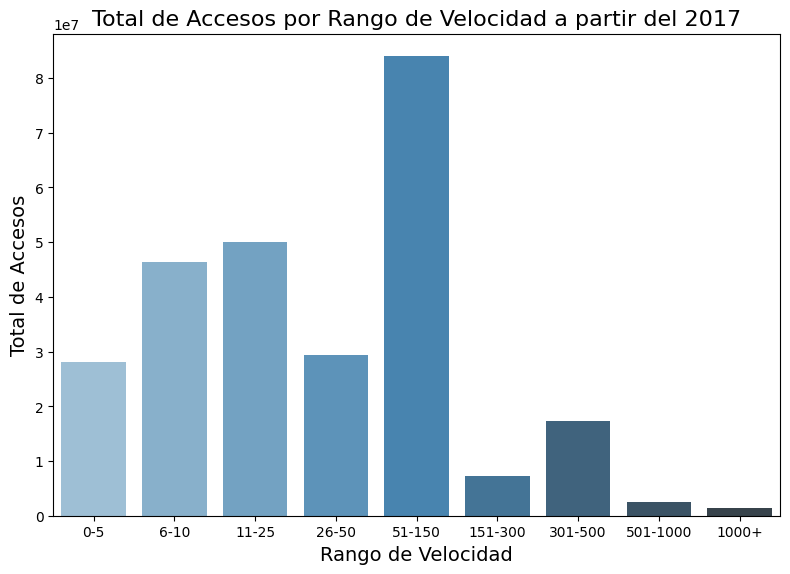

In [80]:
# veamos los rangos de velocidad comparando con los accesos totales desde el año 2017
# calculamos los totales por rango
totales_por_rango = dicc_dfs_depurado['Velocidad_sin_Rangos'].groupby('Rango de Velocidad')['Accesos'].sum().reset_index()

# realicemos un grafico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=totales_por_rango, x='Rango de Velocidad', y='Accesos', palette='Blues_d')
plt.title('Total de Accesos por Rango de Velocidad a partir del 2017', fontsize=16)
plt.xlabel('Rango de Velocidad', fontsize=14)
plt.ylabel('Total de Accesos', fontsize=14)
plt.tight_layout()
plt.show()

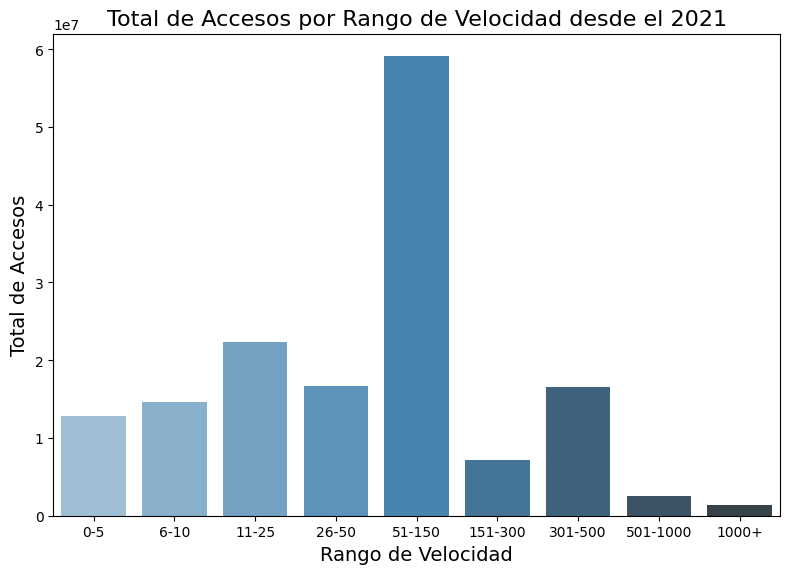

In [81]:
# veamos como fue el comportamiento solo desde el año 2021 en adelante
# filtramos los datos para incluir solo años 2021 en adelante
VSR_filtrado21 = dicc_dfs_depurado['Velocidad_sin_Rangos'][dicc_dfs_depurado['Velocidad_sin_Rangos']['Año'] >= 2021]

# calculamos los totales por rango para el df filtrado
totales_por_rango = VSR_filtrado21.groupby('Rango de Velocidad')['Accesos'].sum().reset_index()

# realicemos un grafico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=totales_por_rango, x='Rango de Velocidad', y='Accesos', palette='Blues_d')
plt.title('Total de Accesos por Rango de Velocidad desde el 2021', fontsize=16)
plt.xlabel('Rango de Velocidad', fontsize=14)
plt.ylabel('Total de Accesos', fontsize=14)
plt.tight_layout()
plt.show()

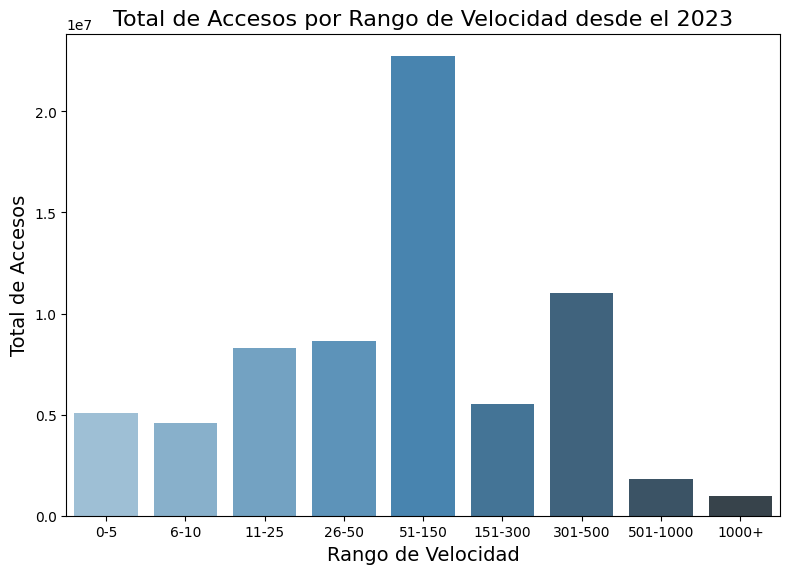

In [82]:
# ahora veamos como fue el comportamiento solo a partir del año 2023
# filtramos los datos para incluir solo años 2023 en adelante
VSR_filtrado23 = dicc_dfs_depurado['Velocidad_sin_Rangos'][dicc_dfs_depurado['Velocidad_sin_Rangos']['Año'] >= 2023]

# calculamos los totales por rango para el df filtrado
totales_por_rango = VSR_filtrado23.groupby('Rango de Velocidad')['Accesos'].sum().reset_index()

# realicemos un grafico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=totales_por_rango, x='Rango de Velocidad', y='Accesos', palette='Blues_d')
plt.title('Total de Accesos por Rango de Velocidad desde el 2023', fontsize=16)
plt.xlabel('Rango de Velocidad', fontsize=14)
plt.ylabel('Total de Accesos', fontsize=14)
plt.tight_layout()
plt.show()

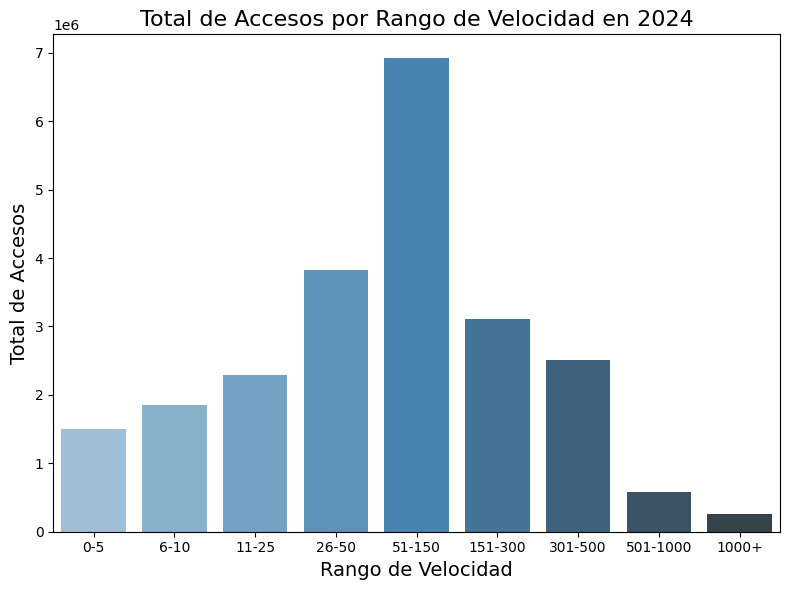

In [83]:
# ultima observacion de estas barras solo para el año 2024
# filtramos los datos para incluir solo años 2024 en adelante
VSR_filtrado24 = dicc_dfs_depurado['Velocidad_sin_Rangos'][dicc_dfs_depurado['Velocidad_sin_Rangos']['Año'] >= 2024]

# calculamos los totales por rango para el df filtrado
totales_por_rango = VSR_filtrado24.groupby('Rango de Velocidad')['Accesos'].sum().reset_index()

# realicemos un grafico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=totales_por_rango, x='Rango de Velocidad', y='Accesos', palette='Blues_d')
plt.title('Total de Accesos por Rango de Velocidad en 2024', fontsize=16)
plt.xlabel('Rango de Velocidad', fontsize=14)
plt.ylabel('Total de Accesos', fontsize=14)
plt.tight_layout()
plt.show()

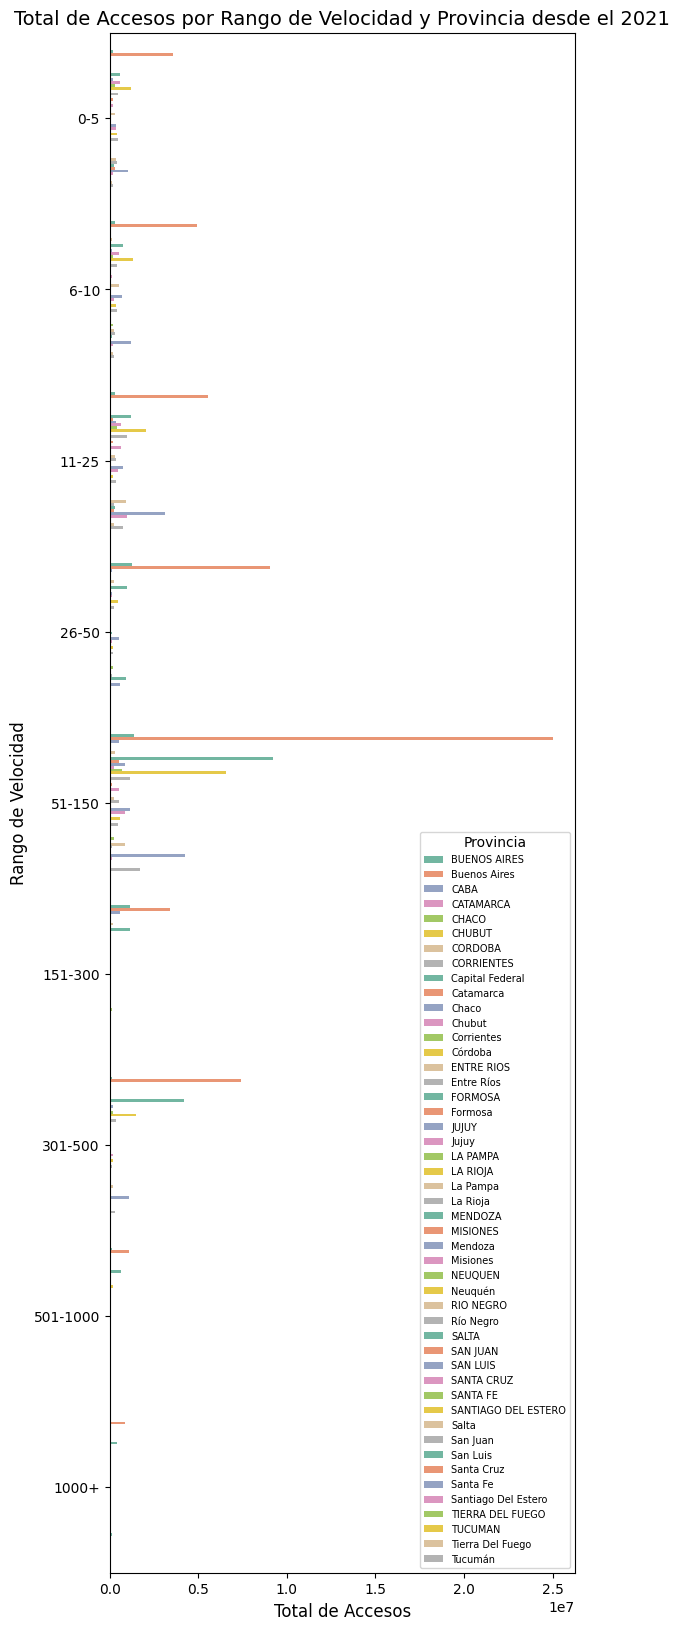

In [84]:
# agregamos las provincias al grafico de barras que tiene los valores desde el 2021
# calculamos los totales por rango para el df filtrado para el 2021
totales_por_rango_provincia = VSR_filtrado21.groupby(['Rango de Velocidad', 'Provincia'])['Accesos'].sum().reset_index()

# realicemos el grafico de barras
plt.figure(figsize=(6, 20))
sns.barplot(data=totales_por_rango_provincia, y='Rango de Velocidad', x='Accesos', hue='Provincia', palette='Set2', dodge=True)
plt.title('Total de Accesos por Rango de Velocidad y Provincia desde el 2021', fontsize=14)
plt.ylabel('Rango de Velocidad', fontsize=12)
plt.xlabel('Total de Accesos', fontsize=12)
plt.legend(title='Provincia', fontsize=7)
plt.show()

Hemos encontrado inconsistencias en los nombres de las provincias, por lo tanto debemos corregirlas. Aprovecharemos también para hacer una clasificación de las provincias a modo de tener una vista global de la distribución de los accesos y de los rangos de velocidad a nivel país. La agrupación será en regiones NEA, NOA, CUYO, PAMPEANA y PATAGONIA tomando para esta un criterio geográfico, cultural y, sobre todo, económico.

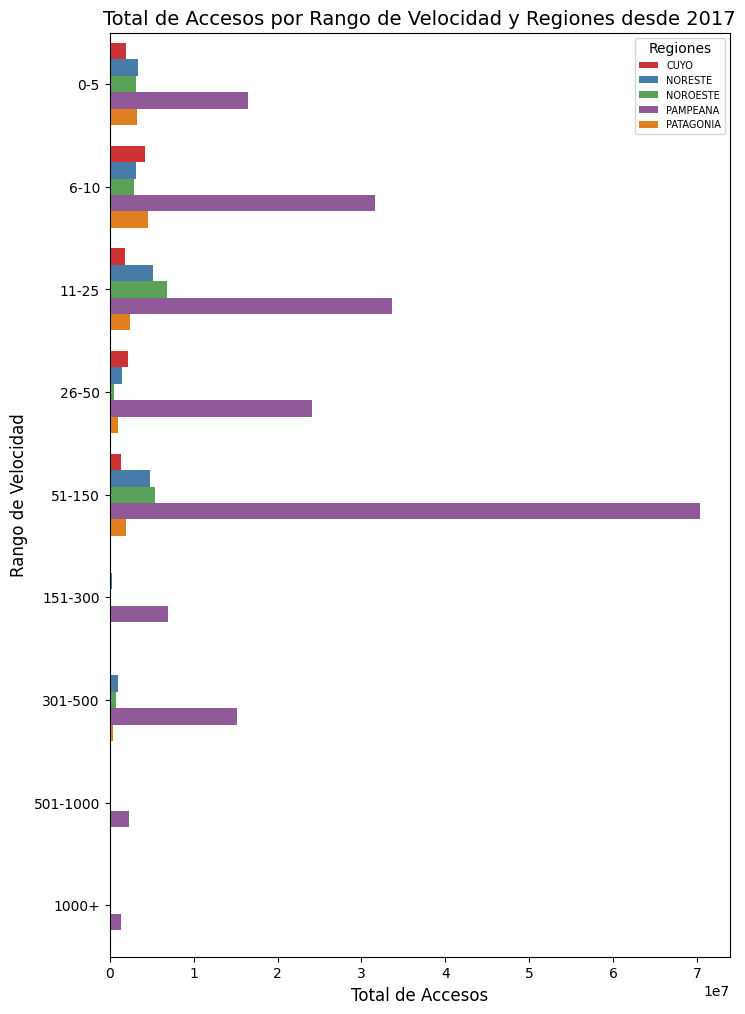

In [85]:
# vamos a agrupar por regiones las provincias para tener una visualizacion mas global
# primero haremos correcciones en los nombres de las provincias
# normalizamos nombres de las provincias (mayúsculas y sin acentos)
dicc_dfs_depurado['Velocidad_sin_Rangos']['Provincia'] = dicc_dfs_depurado['Velocidad_sin_Rangos']['Provincia'].str.upper()  # convertimos a mayúsculas
dicc_dfs_depurado['Velocidad_sin_Rangos']['Provincia'] = dicc_dfs_depurado['Velocidad_sin_Rangos']['Provincia'].apply(unidecode.unidecode)  # quitamos los acentos

# definimos las regiones del pais para agrupar provincias

regiones = {
    'JUJUY':'NOROESTE',
    'SALTA':'NOROESTE',
    'TUCUMAN':'NOROESTE',
    'CATAMARCA':'NOROESTE',
    'LA RIOJA':'NOROESTE',
    'SANTIAGO DEL ESTERO': 'NOROESTE',
    'FORMOSA':'NORESTE',
    'CHACO':'NORESTE',
    'CORRIENTES':'NORESTE',
    'MISIONES':'NORESTE',
    'ENTRE RIOS':'NORESTE',
    'MENDOZA':'CUYO',
    'SAN JUAN':'CUYO',
    'SAN LUIS':'CUYO',
    'BUENOS AIRES':'PAMPEANA',
    'CORDOBA':'PAMPEANA',
    'SANTA FE':'PAMPEANA',
    'LA PAMPA':'PAMPEANA',
    'CABA':'PAMPEANA',
    'CAPITAL FEDERAL':'PAMPEANA',
    'NEUQUEN':'PATAGONIA',
    'RIO NEGRO':'PATAGONIA',
    'CHUBUT':'PATAGONIA',
    'SANTA CRUZ':'PATAGONIA',
    'TIERRA DEL FUEGO':'PATAGONIA',
}

# asignamos las regiones a las provincias con método map
dicc_dfs_depurado['Velocidad_sin_Rangos']['Regiones'] = dicc_dfs_depurado['Velocidad_sin_Rangos']['Provincia'].map(regiones)

# calculamos los totales por rango y regiones
totales_por_rango_regiones = dicc_dfs_depurado['Velocidad_sin_Rangos'].groupby(['Rango de Velocidad', 'Regiones'])['Accesos'].sum().reset_index()

# realicemos el grafico de barras
plt.figure(figsize=(8, 12))
sns.barplot(data=totales_por_rango_regiones, y='Rango de Velocidad', x='Accesos', hue='Regiones', palette='Set1', dodge=True)
plt.title('Total de Accesos por Rango de Velocidad y Regiones desde 2017', fontsize=14)
plt.ylabel('Rango de Velocidad', fontsize=12)
plt.xlabel('Total de Accesos', fontsize=12)
plt.legend(title='Regiones', fontsize=7)
plt.show()

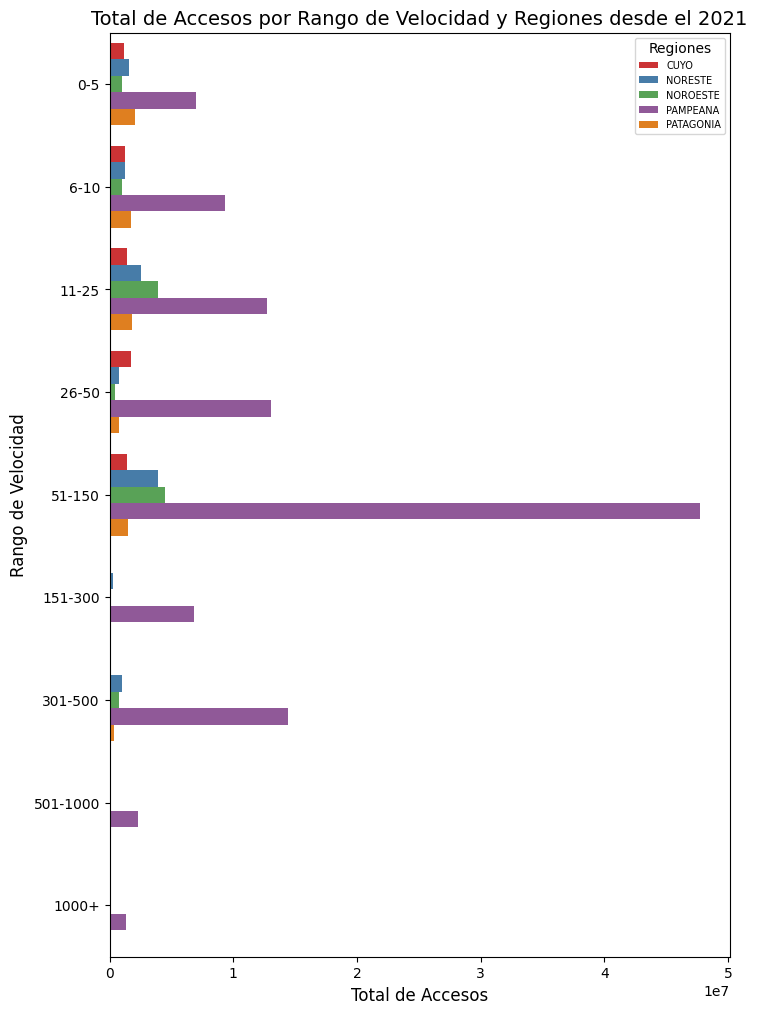

In [86]:
# visualicemos con el df filtrado desde 2021
VSR_filtrado21 = dicc_dfs_depurado['Velocidad_sin_Rangos'][dicc_dfs_depurado['Velocidad_sin_Rangos']['Año'] >= 2021]

# calculamos los totales por rango y regiones para el df filtrado desde el 2021
totales_por_rango_regiones = VSR_filtrado21.groupby(['Rango de Velocidad', 'Regiones'])['Accesos'].sum().reset_index()

# realicemos el grafico de barras
plt.figure(figsize=(8, 12))
sns.barplot(data=totales_por_rango_regiones, y='Rango de Velocidad', x='Accesos', hue='Regiones', palette='Set1', dodge=True)
plt.title('Total de Accesos por Rango de Velocidad y Regiones desde el 2021', fontsize=14)
plt.ylabel('Rango de Velocidad', fontsize=12)
plt.xlabel('Total de Accesos', fontsize=12)
plt.legend(title='Regiones', fontsize=7)
plt.show()

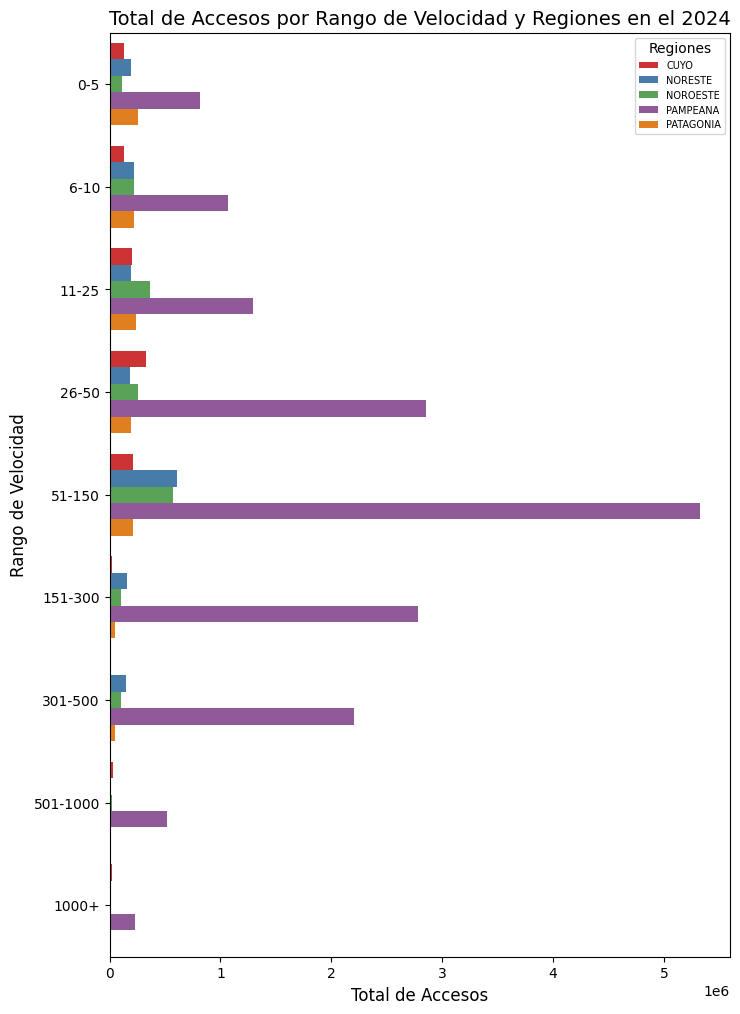

In [87]:
# ahora visualicemos solo el 2024
VSR_filtrado24 = dicc_dfs_depurado['Velocidad_sin_Rangos'][dicc_dfs_depurado['Velocidad_sin_Rangos']['Año'] >= 2024]

# calculamos los totales por rango y regiones para el 2024
totales_por_rango_regiones = VSR_filtrado24.groupby(['Rango de Velocidad', 'Regiones'])['Accesos'].sum().reset_index()

plt.figure(figsize=(8, 12))
sns.barplot(data=totales_por_rango_regiones, y='Rango de Velocidad', x='Accesos', hue='Regiones', palette='Set1', dodge=True)
plt.title('Total de Accesos por Rango de Velocidad y Regiones en el 2024', fontsize=14)
plt.ylabel('Rango de Velocidad', fontsize=12)
plt.xlabel('Total de Accesos', fontsize=12)
plt.legend(title='Regiones', fontsize=7)
plt.show()



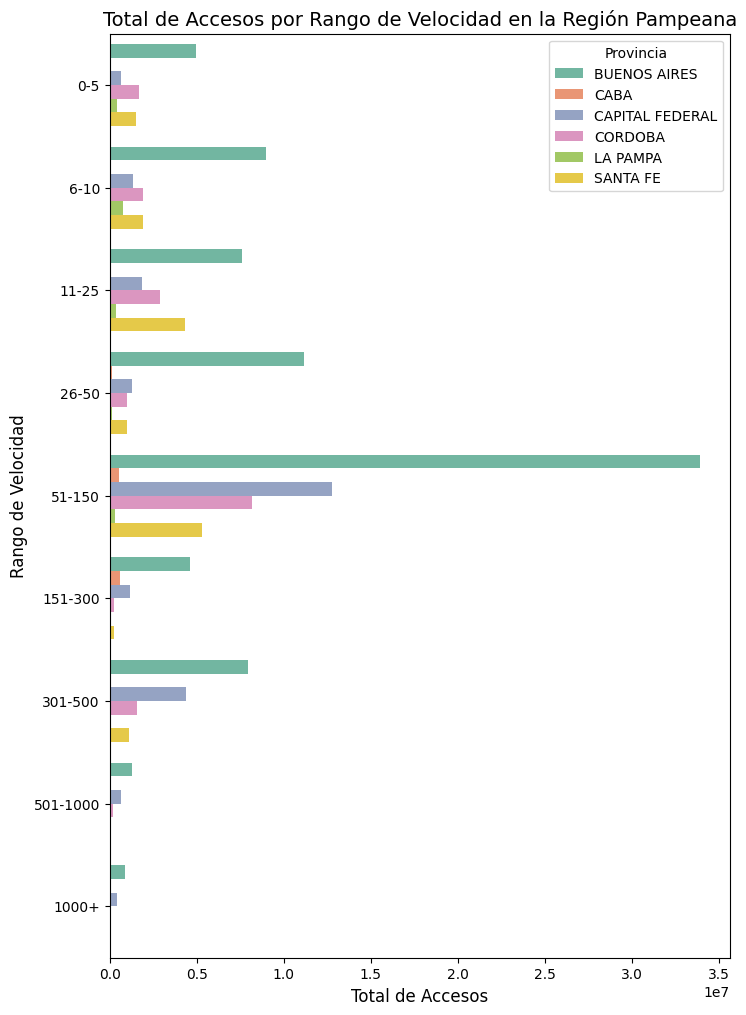

In [88]:
# por último veamos solo las provincias de la región pampeana desde 2020
# filtrar el DataFrame para incluir solo las filas de la región pampeana
df_pampeana_2020 = dicc_dfs_depurado['Velocidad_sin_Rangos'][(dicc_dfs_depurado['Velocidad_sin_Rangos']['Regiones'] == 'PAMPEANA') &
    (dicc_dfs_depurado['Velocidad_sin_Rangos']['Año'] >= 2020)]

# Agrupar por rango de velocidad y provincia
totales_pampeana = df_pampeana_2020.groupby(['Rango de Velocidad', 'Provincia'])['Accesos'].sum().reset_index()

plt.figure(figsize=(8, 12))
sns.barplot(
    data=totales_pampeana, 
    y='Rango de Velocidad', 
    x='Accesos', 
    hue='Provincia', 
    palette='Set2', 
    dodge=True
)
plt.title('Total de Accesos por Rango de Velocidad en la Región Pampeana', fontsize=14)
plt.ylabel('Rango de Velocidad', fontsize=12)
plt.xlabel('Total de Accesos', fontsize=12)
plt.legend(title='Provincia', fontsize=10)

**Conclusiones preliminares**

- Podemos observar que las velocidades de internet del total de accesos a nivel nacional fueron mas frecuentes en el rango de 50-150 Mbps para el periodo que se analiza en el dataset provisto, que va desde el año 2017 hasta el primer semestre del 2024.

- En el agregado de regiones hemos podido notar que la región Pampeana ostenta a lo largo de los años la mayor cantidad de accesos en todos los rangos de velocidad. Esto obedece en parte a la ubicación de las provincias, principalmente en el centro del país, a la cantidad superior de población que tienen, pero sobre todo se debe a que en esa región se concentra la mayor cantidad de riqueza nacional. Al ser las provincias de mayor ingreso tienen más posibilidades de extender los accesos ya sea a través de Banda Ancha Fija o inalámbricas o Satelital, ya que es más conveniente para las empresas invertir en esa región donde la rentabilidad del negocio estaría de alguna manera asegurada.

- Para el caso de las provincias de las regiones del norte del país hemos observado que con el transcurso de los años han podido aumentar considerablemente el acceso a mayores rangos de velocidad pero quedando aun muy lejos de los niveles que tienen las provincias del centro del pais.

- En el caso de las provincias de las regiones Cuyo y Patagonia se ha notado un muy leve aumento de los accesos y la velocidad de internet a través de los años. Esto posiblemente se deba a las distancias que deben cubrir, la cantidad menor de poblacion y las zonas de dificil acceso lo que hace menos rentable aplicar inversiones en Internet.

- En cuanto a la distribución de los accesos a nivel de provincia, se puede observar que Buenos Aires y Capital Federal llevan estrepitosamente la ventaja respecto de las demás. La inequidad de los ingresos per capita y el centralismo que supone tener allí las instituciones nacionales y las sedes de las pincipales empresas, asi como el puerto principal del pais por donde emerge el comercio exterior, hace que la infraestructura tecnológica aplicada en toda esa región permita una notable disparidad en la cantidad de accesos a internet, asi como las velocidades mas altas, respecto de las demás provincias.

Pasemos a analizar "Accesos Por Tecnología" para inspeccionar como se distribuyen las diferentes formas de acceso a Internet a lo largo de la Argentina

In [89]:
# visualizamos la hoja "Accesos Por Tecnología" con el avance del df depurado
dicc_dfs_depurado['Accesos Por Tecnología'].head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [90]:
# hemos visto que esta hoja tenia algunos valores nulos
print(dicc_dfs_depurado['Accesos Por Tecnología'].isnull().sum())

Año             1
Trimestre       1
Provincia       2
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


In [91]:
# procedemos a eliminar esa cantidad insignificante de nulos
dicc_dfs_depurado['Accesos Por Tecnología'].dropna(inplace=True)

In [103]:
# revisamos nuevamente el df "Accesos Por Tecnología"
dicc_dfs_depurado['Accesos Por Tecnología'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1007 non-null   int64  
 1   Trimestre     1007 non-null   int64  
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 78.7+ KB


In [93]:
# si bien ya no quedan nulos vemos que Año y Trimestre no son de tipo int
# prcedamos a transformar esos datos, previo corregir los valores no numéricos
dicc_dfs_depurado['Accesos Por Tecnología']['Año'] = dicc_dfs_depurado['Accesos Por Tecnología']['Año'].replace('[^0-9]', '', regex=True).astype(int)
dicc_dfs_depurado['Accesos Por Tecnología']['Trimestre'] = dicc_dfs_depurado['Accesos Por Tecnología']['Trimestre'].replace('[^0-9]', '', regex=True).astype(int)

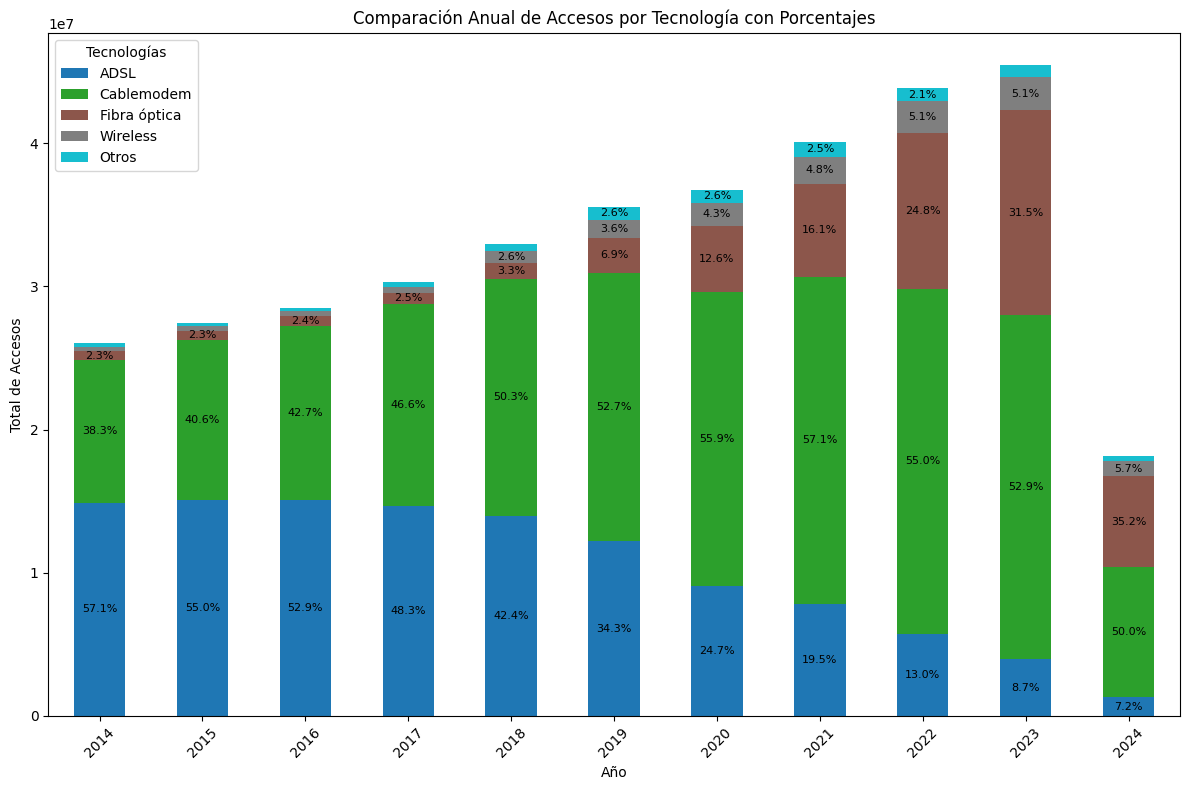

In [96]:
# usemos algunas graficas para evaluar los datos

# vamos a comparar por años los accesos totales por tecnologias
# agrupamos los datos por 'Año' y sumamos las tecnologías
accesos_tecnolog_anios = dicc_dfs_depurado['Accesos Por Tecnología'].groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# calculamos el porcentaje de cada segmento sobre el total por año
df_porcentaje = accesos_tecnolog_anios.div(accesos_tecnolog_anios.sum(axis=1), axis=0) * 100

# creamos el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
bars = accesos_tecnolog_anios.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10', ax=ax)

# agregamos los porcentajes como texto al lado de cada segmento
for idx, year in enumerate(accesos_tecnolog_anios.index):
    bottom = 0  # aqui se controla la posición acumulada de las barras
    for tech in accesos_tecnolog_anios.columns:
        value = accesos_tecnolog_anios.loc[year, tech]
        percentage = df_porcentaje.loc[year, tech]
        # mostramos etiquetas significativas (por ejemplo, mayores al 2%)
        if percentage > 2:
            ax.text(
                idx, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8
            )
        bottom += value

# Personalizar el gráfico
plt.title('Comparación Anual de Accesos por Tecnología con Porcentajes')
plt.xlabel('Año')
plt.ylabel('Total de Accesos')
plt.xticks(rotation=45)
plt.legend(title='Tecnologías')
plt.tight_layout()

# Mostrar el gráfico

**ALGO DE CONTEXTO TECNOLOGICO PARA ENTEDER MAS LOS DATOS**

En el mundo actual, la conexión a Internet se ha vuelto esencial para la vida diaria, el trabajo y el entretenimiento. Existen diversas tecnologías que permiten acceder a la red, cada una con sus propias ventajas y desventajas. A continuación, se presenta un breve resumen de las más comunes:

1. Fibra óptica
Ventajas:
* Velocidad: La fibra óptica ofrece la mayor velocidad de conexión a Internet, permitiendo descargar y cargar archivos rápidamente, así como disfrutar de contenido multimedia en alta definición sin interrupciones.
* Baja latencia: La latencia es el tiempo que tarda en viajar la información desde el origen hasta el destino. La fibra óptica ofrece una latencia muy baja, lo que es ideal para juegos en línea, videoconferencias y otras aplicaciones que requieren una respuesta rápida.
* Estabilidad: La conexión de fibra óptica es menos susceptible a interferencias electromagnéticas y condiciones climáticas, lo que garantiza una conexión más estable y confiable.
Desventajas:
* Disponibilidad: La fibra óptica no está disponible en todas las áreas, especialmente en zonas rurales o de difícil acceso.
* Costo: La instalación de fibra óptica puede ser más costosa que otras tecnologías, aunque los precios han ido disminuyendo con el tiempo.

2. ADSL (Línea de Abonado Digital Asimétrica)
Ventajas:
* Disponibilidad: El ADSL utiliza la línea telefónica existente, por lo que está disponible en muchas áreas donde la fibra óptica aún no ha llegado.
* Costo: El ADSL suele ser más económico que la fibra óptica.
Desventajas:
* Velocidad: La velocidad de conexión ADSL es inferior a la de la fibra óptica, y puede variar según la distancia entre el hogar y la central telefónica.
* Latencia: La latencia del ADSL es mayor que la de la fibra óptica, lo que puede afectar el rendimiento de algunas aplicaciones en línea.

3. Cable coaxial
Ventajas:
* Velocidad: El cable ofrece velocidades de conexión similares a la fibra óptica en algunos casos, aunque puede ser menos estable.
* Disponibilidad: El cable está disponible en muchas áreas, especialmente en zonas urbanas.
Desventajas:
* Velocidad compartida: La velocidad de conexión puede disminuir si muchos usuarios están conectados a la misma red de cable.
* Latencia: La latencia del cable puede ser mayor que la de la fibra óptica, lo que puede afectar el rendimiento de algunas aplicaciones en línea.

4. Conexiones móviles (4G/5G)
Ventajas:
* Movilidad: Las conexiones móviles permiten acceder a Internet desde cualquier lugar con cobertura.
* Velocidad: Las redes 4G y 5G ofrecen velocidades de conexión cada vez más rápidas, aunque pueden variar según la ubicación y la congestión de la red.
Desventajas:
* Costo: Los planes de datos móviles pueden ser costosos, especialmente si se requiere un gran volumen de datos.
* Limitaciones: La velocidad y la calidad de la conexión pueden verse afectadas por factores como la distancia a la antena, la interferencia y las condiciones climáticas.

5. Satélite
Ventajas:
* Cobertura: La conexión satelital puede llegar a áreas remotas donde otras tecnologías no están disponibles.
Desventajas:
* Latencia: La latencia de la conexión satelital es muy alta, lo que puede dificultar el uso de aplicaciones en tiempo real.
* Costo: La conexión satelital suele ser más costosa que otras opciones.

Fuente:
La información presentada en este informe se ha obtenido de diversas fuentes, incluyendo artículos de prensa, informes de la industria de las telecomunicaciones y páginas web de proveedores de servicios de Internet. Algunas de las fuentes consultadas son:
Ente Nacional de Comunicaciones (ENACOM): https://www.enacom.gob.ar/
Sitios web de noticias y tecnología: https://www.infobae.com/tecno/2024/11/06/el-lugar-secreto-para-ubicar-el-router-de-wifi-y-tener-la-mayor-velocidad-de-internet/

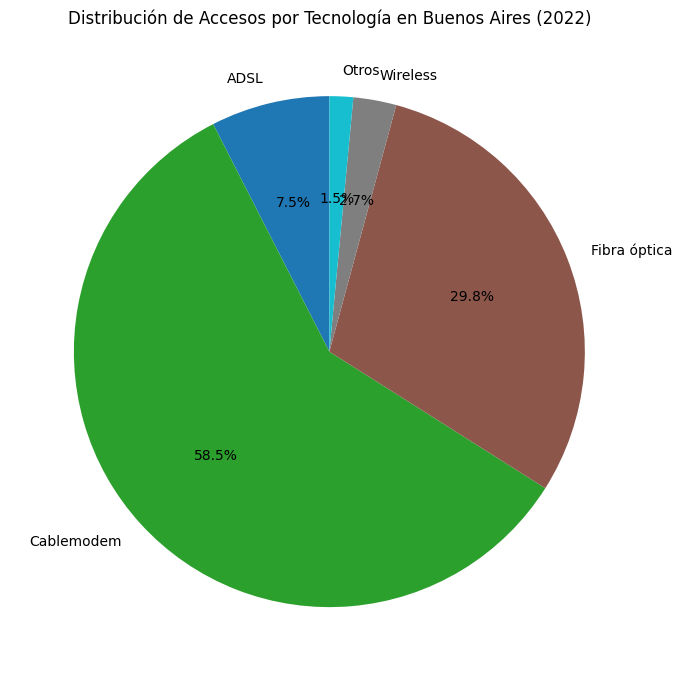

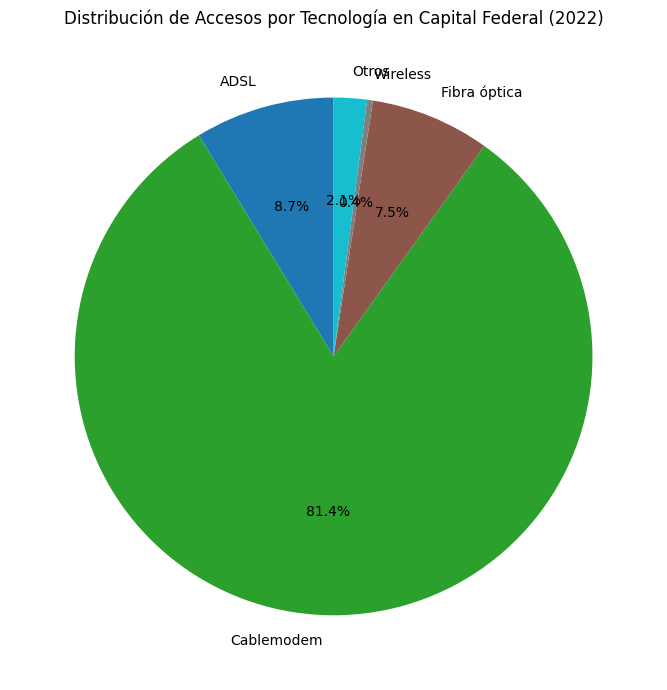

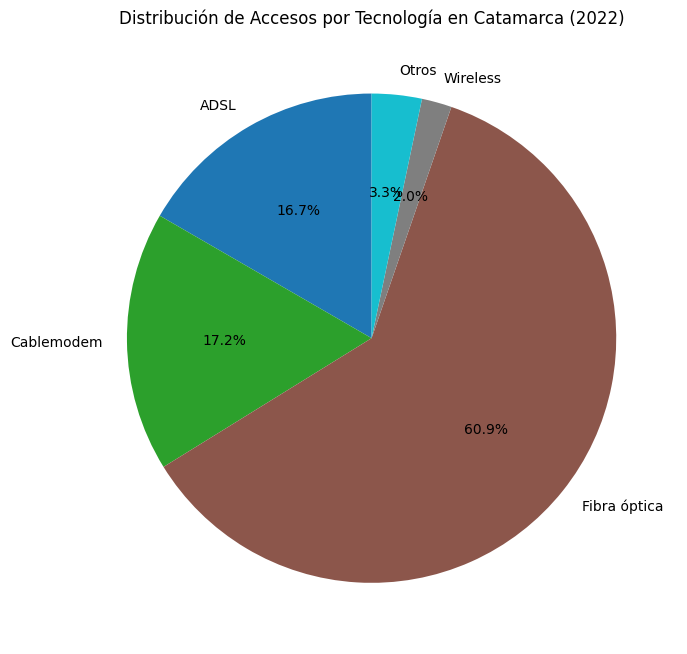

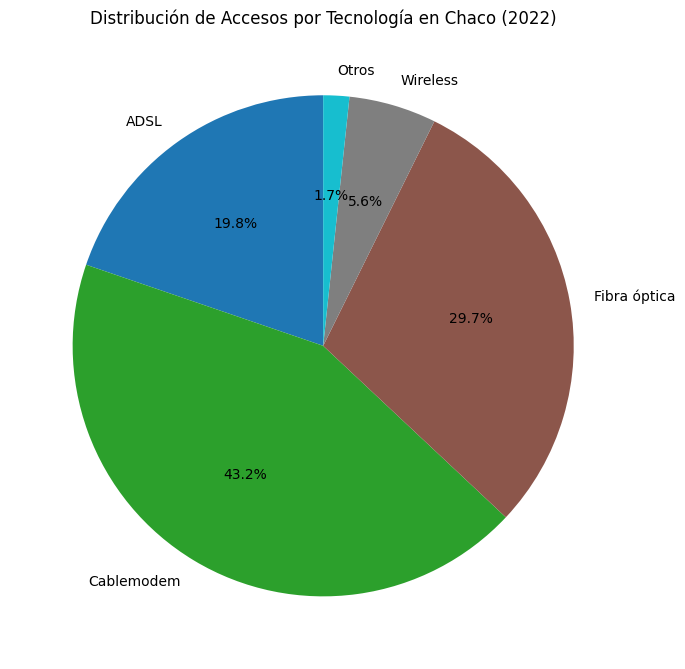

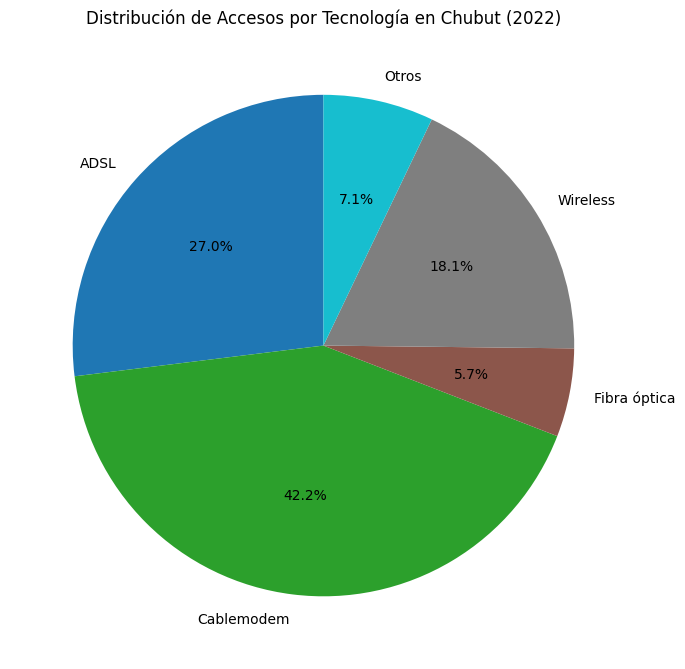

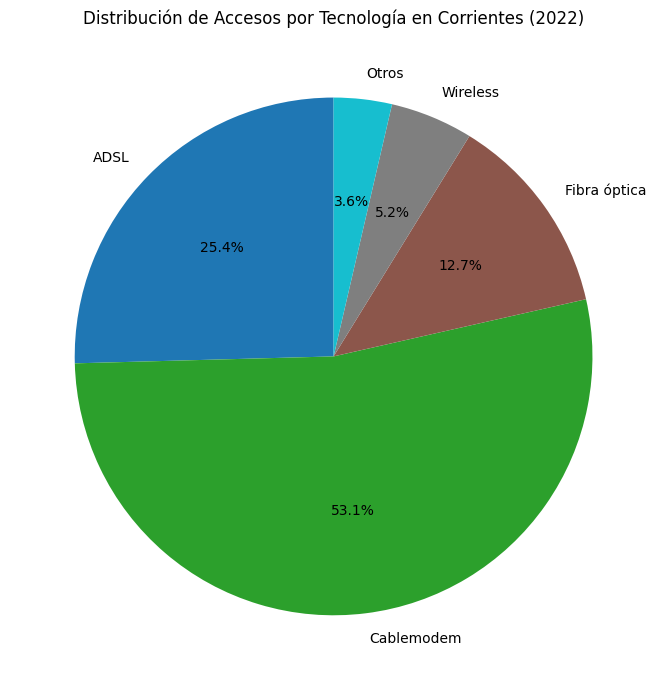

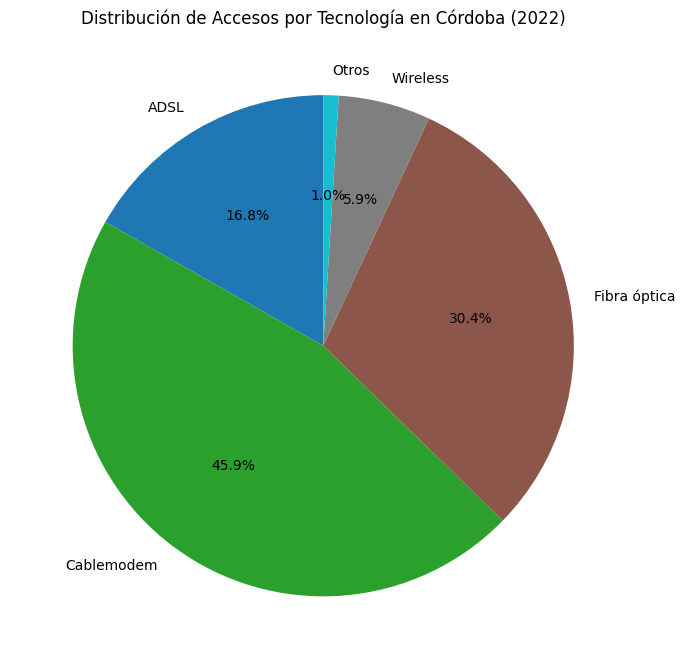

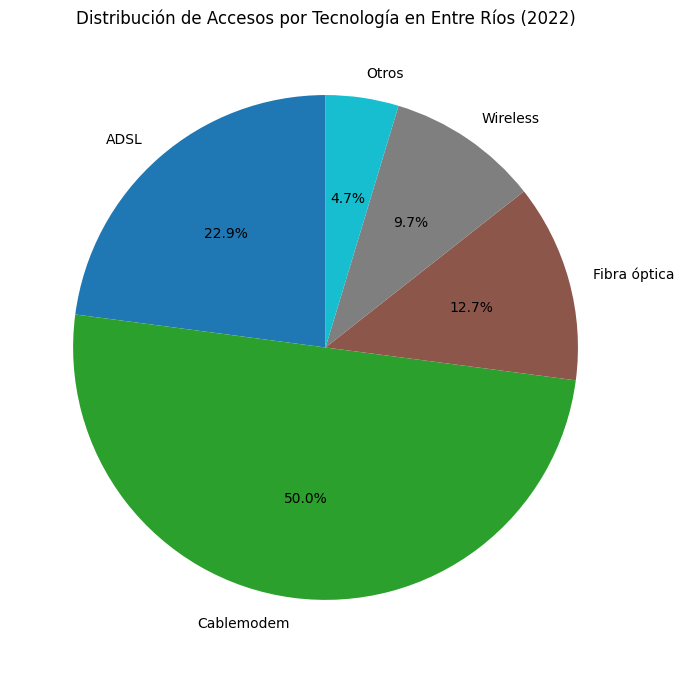

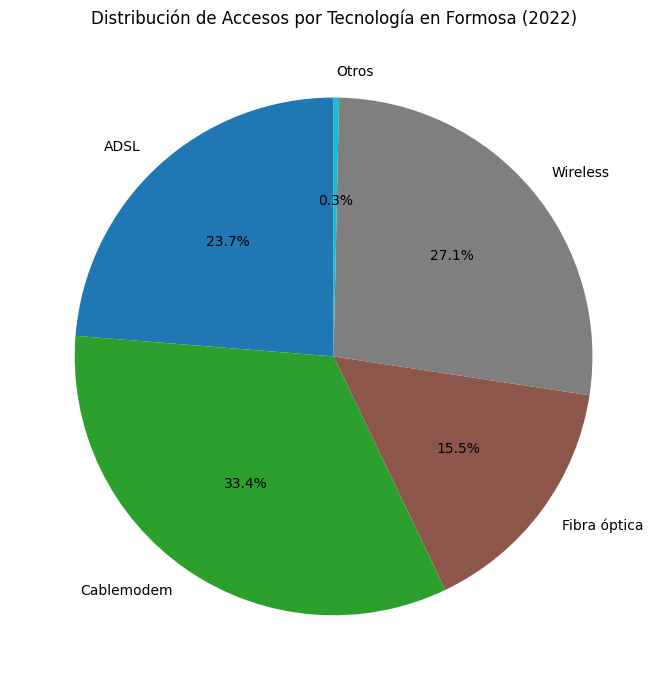

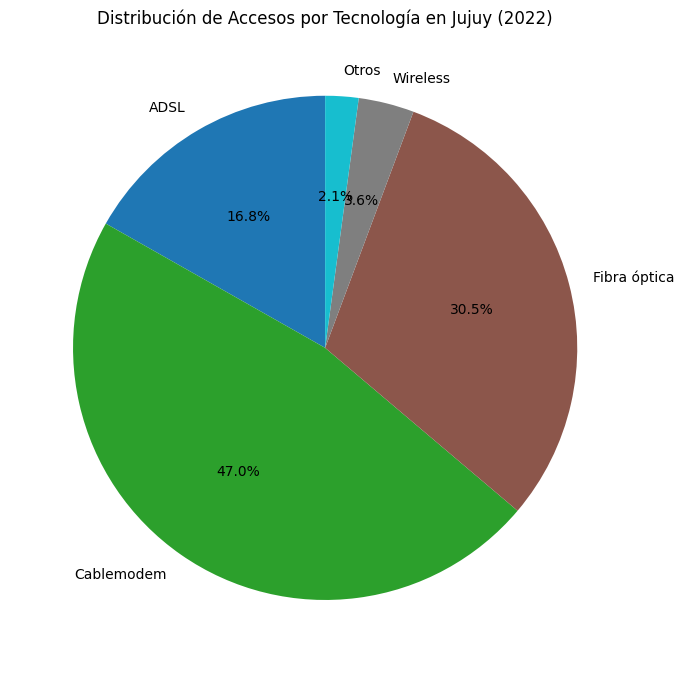

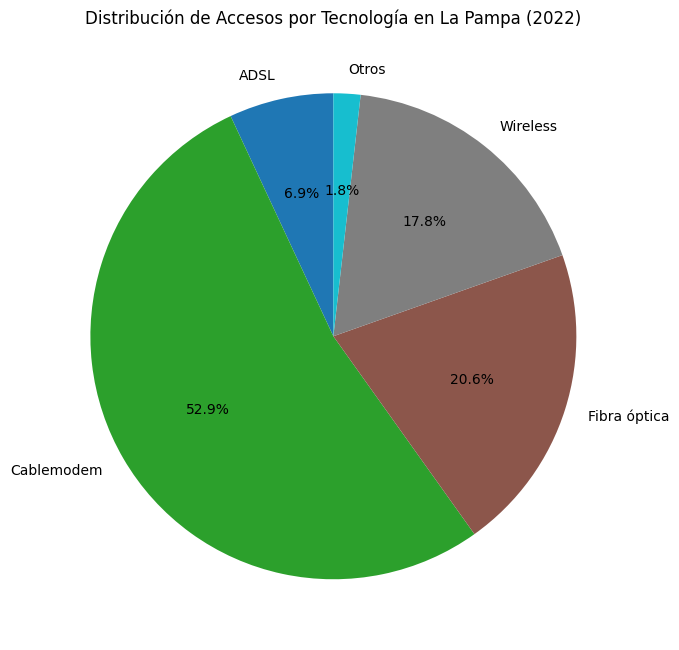

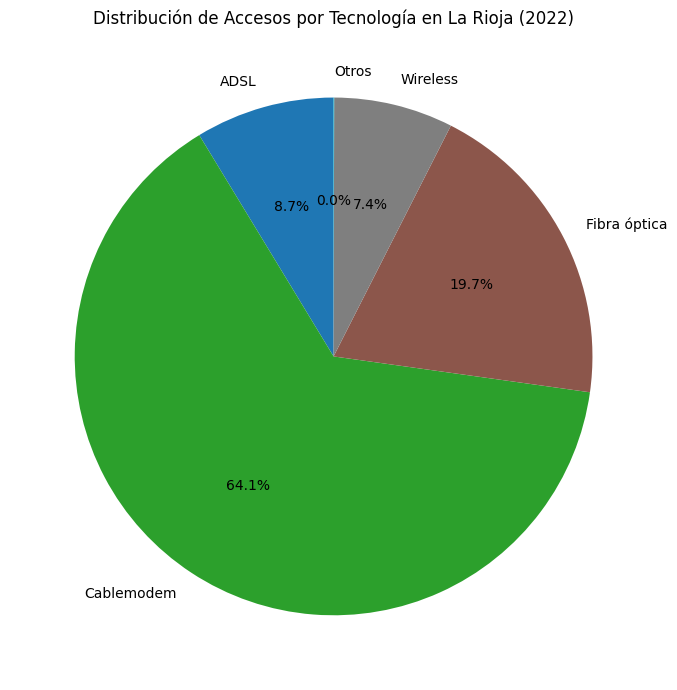

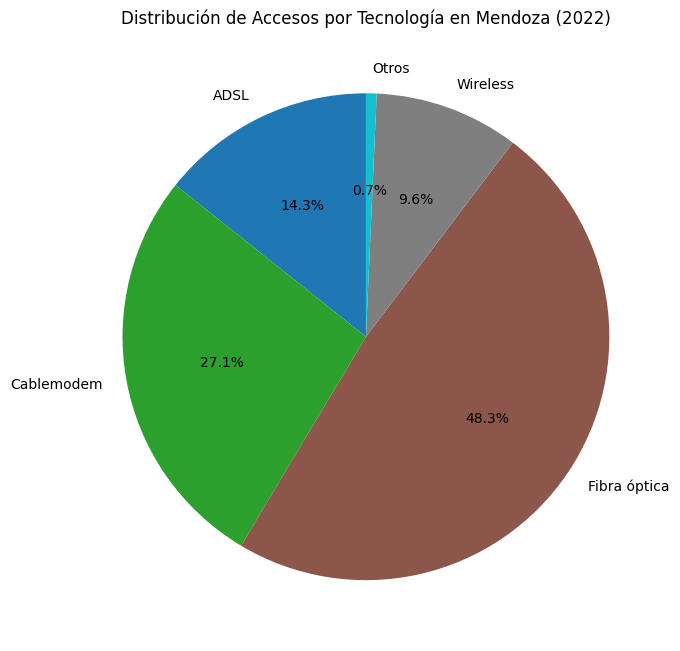

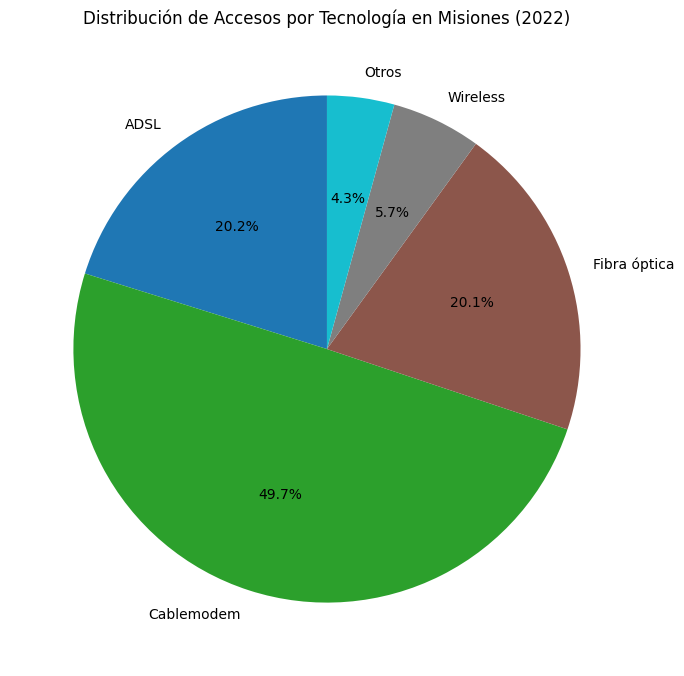

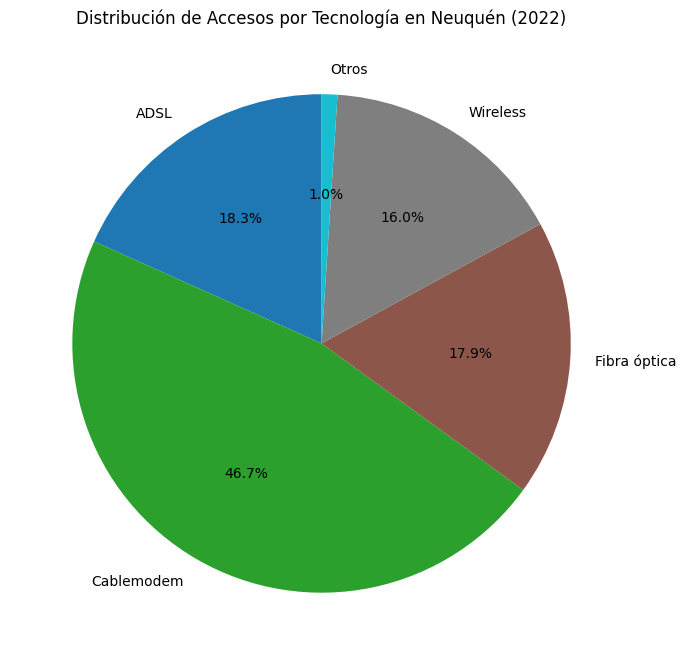

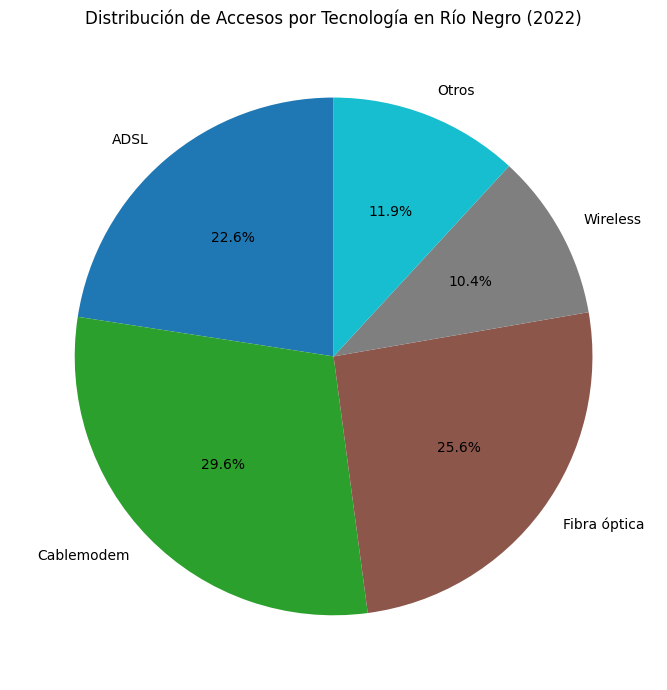

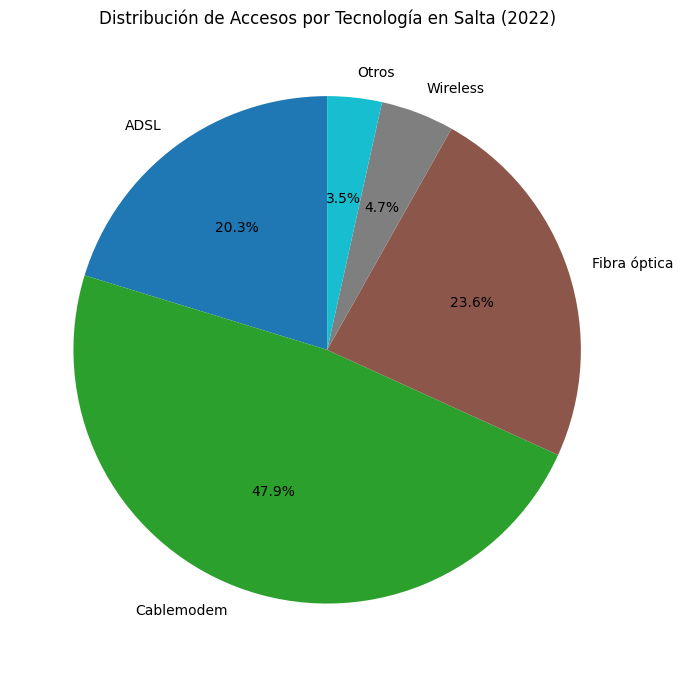

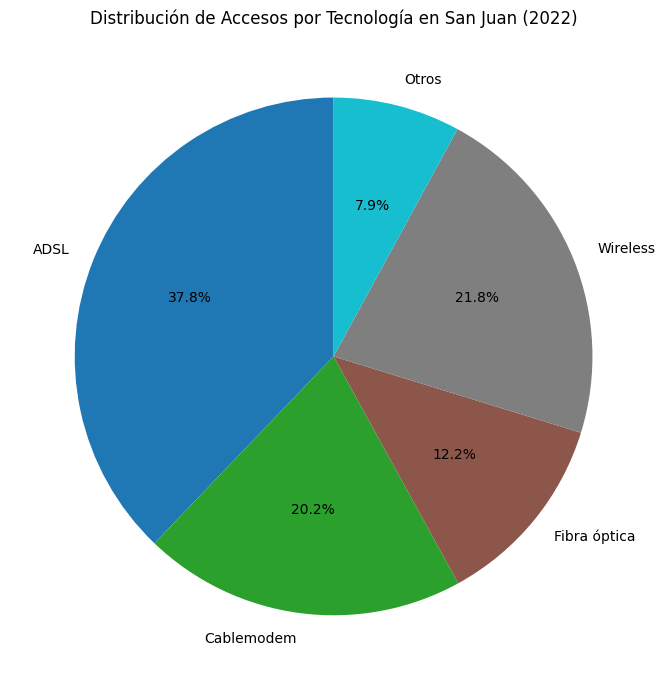

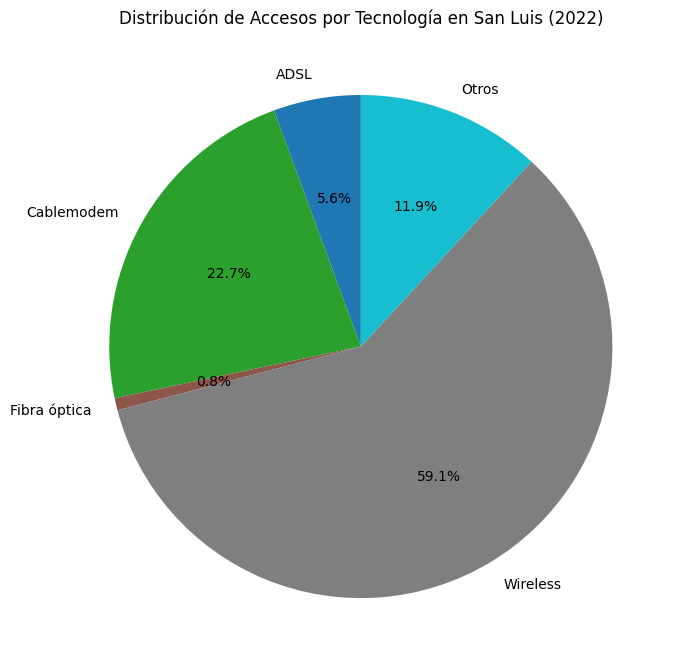

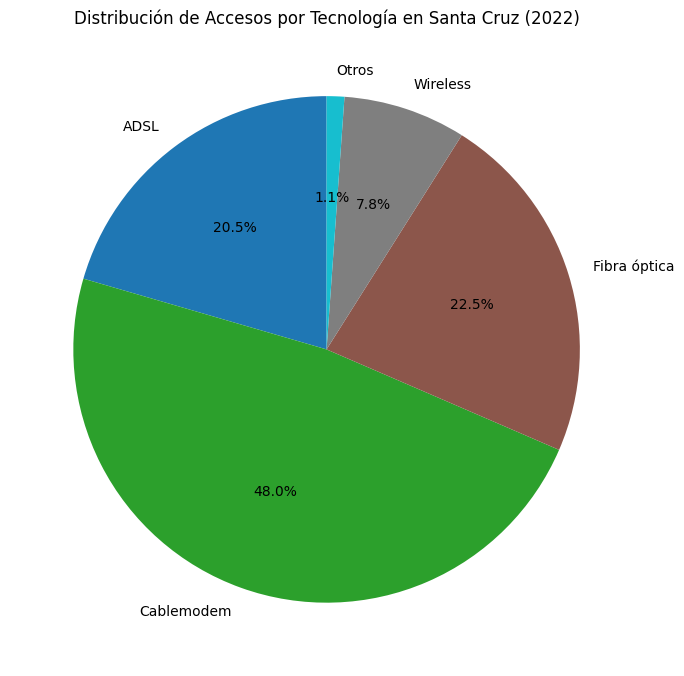

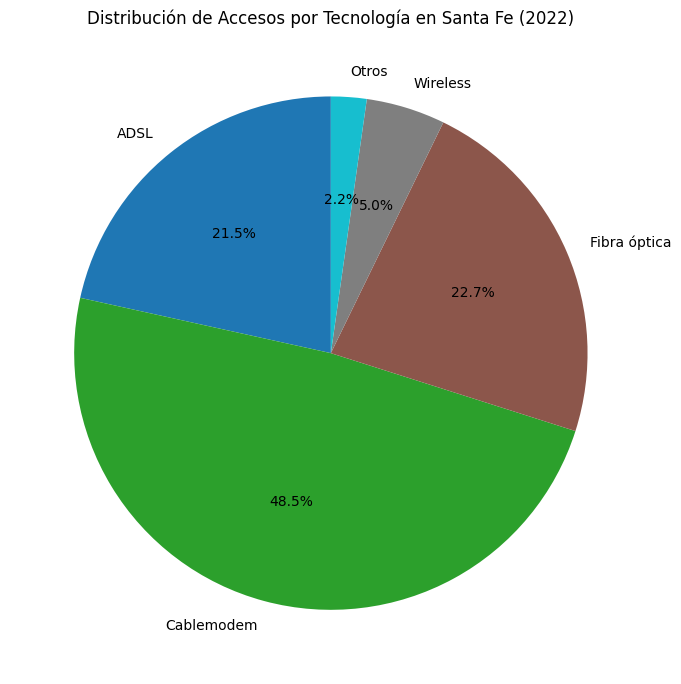

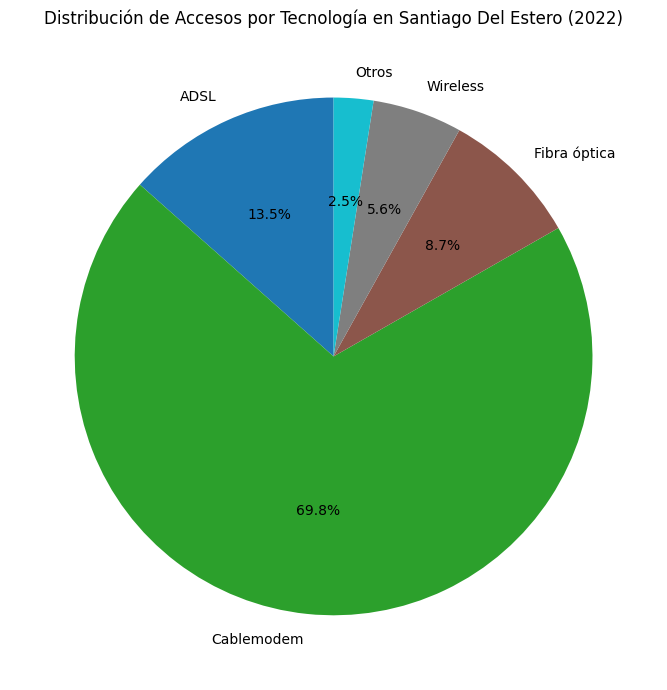

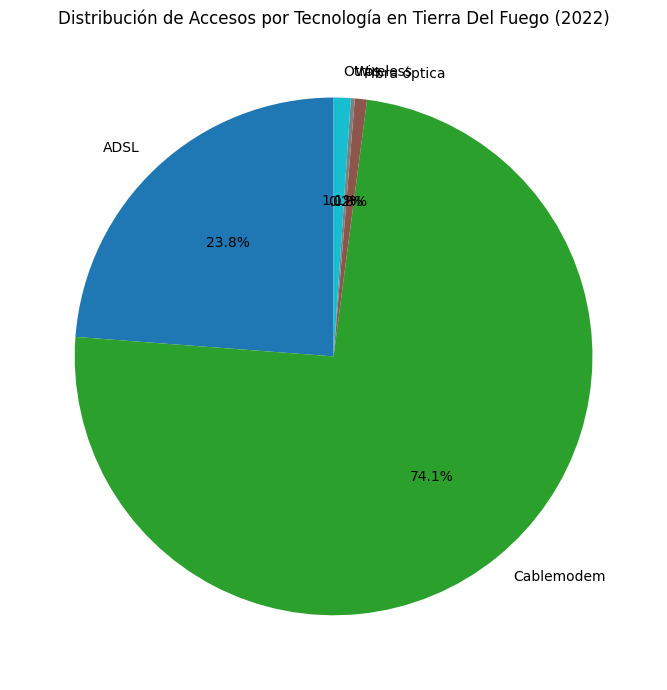

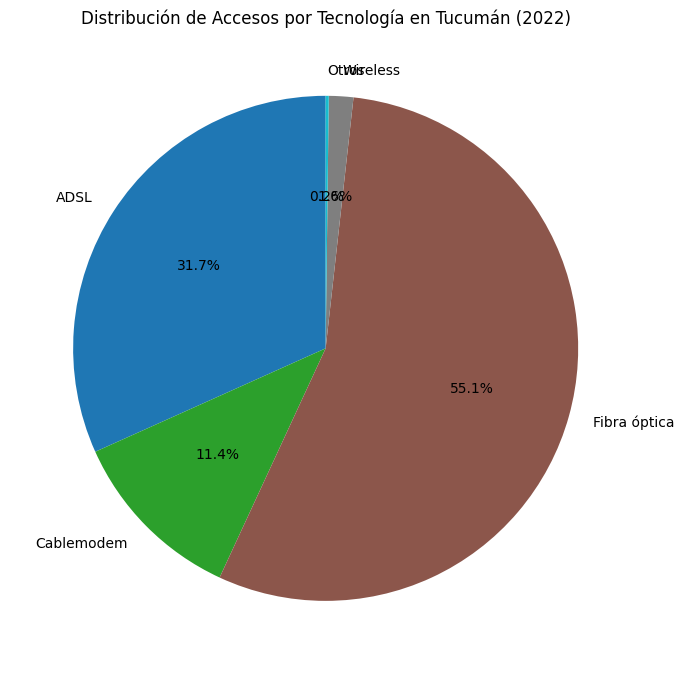

In [99]:
# Filtrar los datos para un año específico
anio_especifico = 2022  # Cambia este valor al año que desees analizar
df_anio = dicc_dfs_depurado['Accesos Por Tecnología'][dicc_dfs_depurado['Accesos Por Tecnología']['Año'] == anio_especifico]

# Agrupar los accesos por provincia y tipo de tecnología (sumar los totales por provincia)
df_tecnologias_provincia = df_anio.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Crear un gráfico de tortas para cada provincia
for provincia in df_tecnologias_provincia.index:
    data = df_tecnologias_provincia.loc[provincia]  # Datos de esa provincia
    plt.figure(figsize=(7, 7))
    data.plot.pie(autopct='%1.1f%%', startangle=90, colormap='tab10')  # Gráfico de torta
    plt.title(f'Distribución de Accesos por Tecnología en {provincia} ({anio_especifico})')
    plt.ylabel('')  # Ocultar etiqueta del eje Y
    plt.tight_layout()
    plt.show()

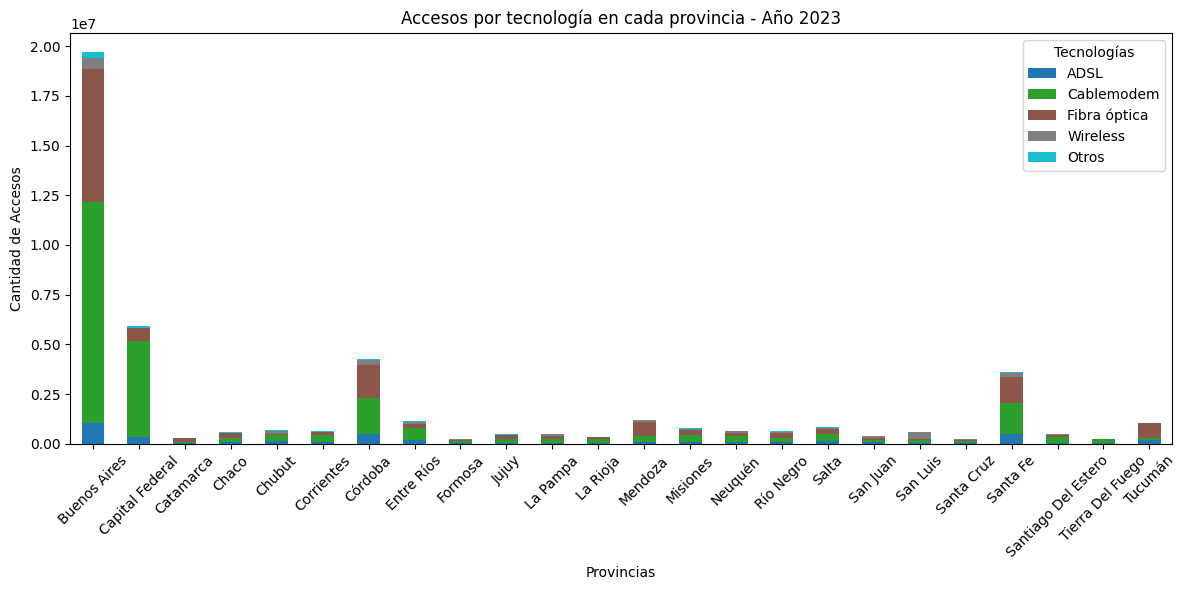

In [107]:
# Filtrar el DataFrame por un año específico
año_especifico = 2023  # Cambia este valor por el año que quieras analizar
df = dicc_dfs_depurado['Accesos Por Tecnología']
df_filtrado = df[df['Año'] == año_especifico]

# Agrupar por provincia y sumar los valores de las tecnologías
df_agrupado = df_filtrado.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Crear el gráfico de barras apiladas
df_agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title(f"Accesos por tecnología en cada provincia - Año {año_especifico}")
plt.ylabel("Cantidad de Accesos")
plt.xlabel("Provincias")
plt.legend(title="Tecnologías")
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visualización
plt.tight_layout()  # Ajustar el diseño para evitar etiquetas cortadas
plt.show()

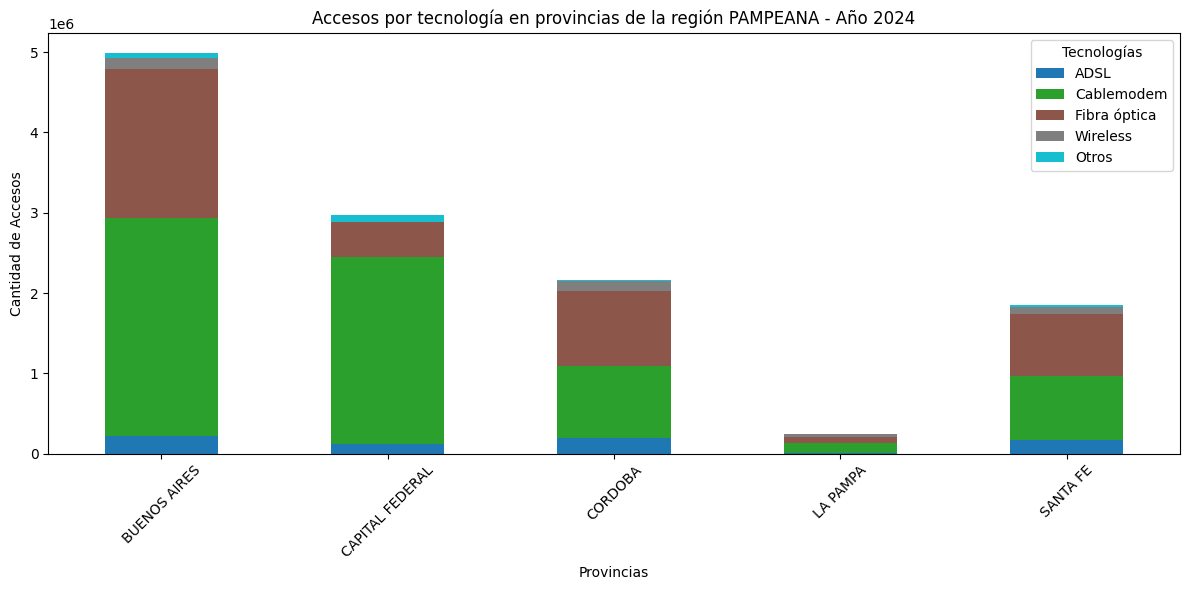

In [109]:
# vamos a agrupar por regiones las provincias para tener una visualizacion mas global
# normalizamos nombres de las provincias (mayúsculas y sin acentos)
dicc_dfs_depurado['Accesos Por Tecnología']['Provincia'] = dicc_dfs_depurado['Accesos Por Tecnología']['Provincia'].str.upper()  # convertimos a mayúsculas
dicc_dfs_depurado['Accesos Por Tecnología']['Provincia'] = dicc_dfs_depurado['Accesos Por Tecnología']['Provincia'].apply(unidecode.unidecode)  # quitamos los acentos

# definimos las regiones del pais para agrupar provincias

regiones = {
    'JUJUY':'NOROESTE',
    'SALTA':'NOROESTE',
    'TUCUMAN':'NOROESTE',
    'CATAMARCA':'NOROESTE',
    'LA RIOJA':'NOROESTE',
    'SANTIAGO DEL ESTERO': 'NOROESTE',
    'FORMOSA':'NORESTE',
    'CHACO':'NORESTE',
    'CORRIENTES':'NORESTE',
    'MISIONES':'NORESTE',
    'ENTRE RIOS':'NORESTE',
    'MENDOZA':'CUYO',
    'SAN JUAN':'CUYO',
    'SAN LUIS':'CUYO',
    'BUENOS AIRES':'PAMPEANA',
    'CORDOBA':'PAMPEANA',
    'SANTA FE':'PAMPEANA',
    'LA PAMPA':'PAMPEANA',
    'CABA':'PAMPEANA',
    'CAPITAL FEDERAL':'PAMPEANA',
    'NEUQUEN':'PATAGONIA',
    'RIO NEGRO':'PATAGONIA',
    'CHUBUT':'PATAGONIA',
    'SANTA CRUZ':'PATAGONIA',
    'TIERRA DEL FUEGO':'PATAGONIA',
}

# asignamos las regiones a las provincias con método map
dicc_dfs_depurado['Accesos Por Tecnología']['Regiones'] = dicc_dfs_depurado['Accesos Por Tecnología']['Provincia'].map(regiones)

# filtramos los datos para una región seleccionada
region_seleccionada = 'PAMPEANA'  # aqui se pone la región a analizr
año_seleccionado = 2024  # aqui cambiamos por el año que desees visualizar
df = dicc_dfs_depurado['Accesos Por Tecnología']
df_filtrado = df[(df['Regiones'] == region_seleccionada) & (df['Año'] == año_seleccionado)] # filtramos

# agrupamos por provincia y sumamos los valores de las tecnologías
df_agrupado = df_filtrado.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# hacemos el gráfico de barras apiladas
df_agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title(f"Accesos por tecnología en provincias de la región {region_seleccionada} - Año {año_seleccionado}")
plt.ylabel("Cantidad de Accesos")
plt.xlabel("Provincias")
plt.legend(title="Tecnologías")
plt.xticks(rotation=45)  # aqui se rota etiquetas para mejor visualización
plt.tight_layout()  # con esto se ajusta el diseño para evitar etiquetas cortadas
plt.show()

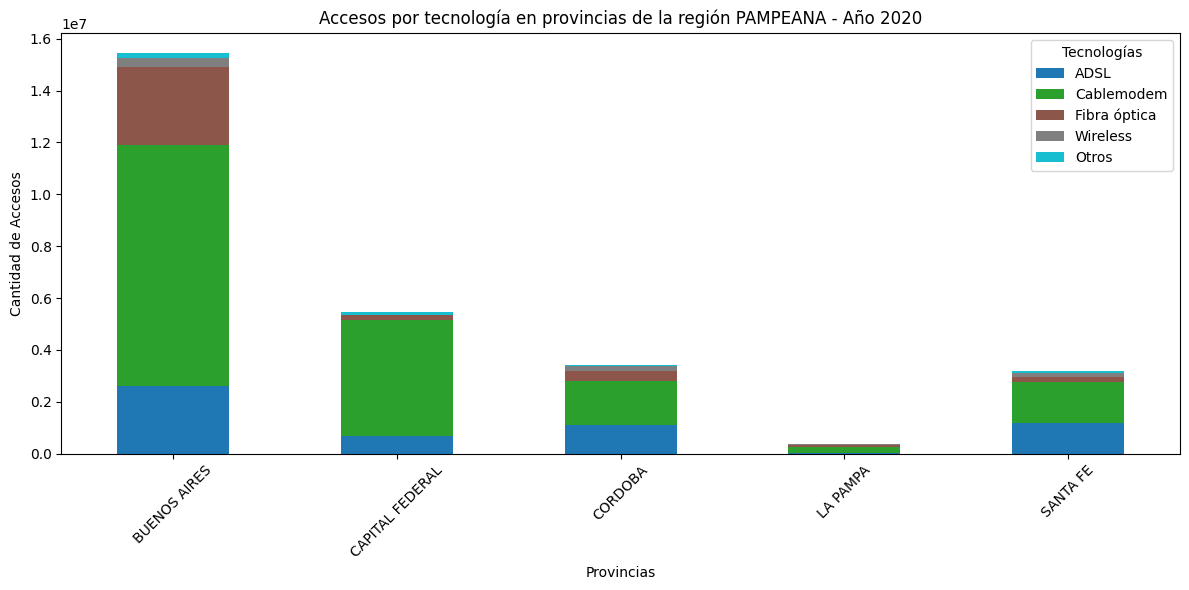

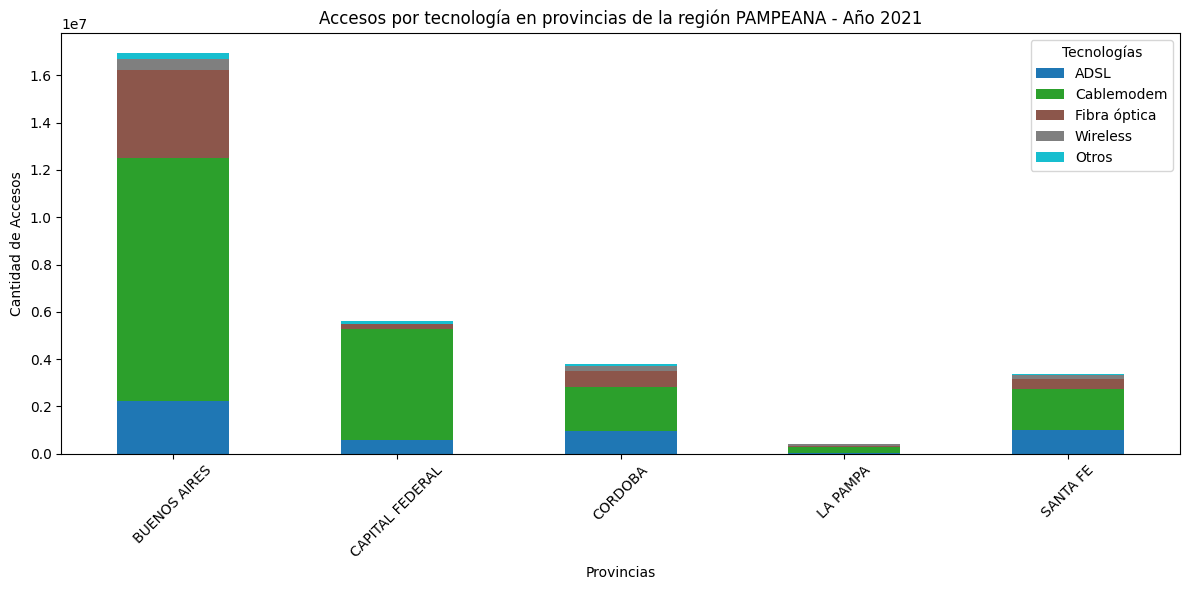

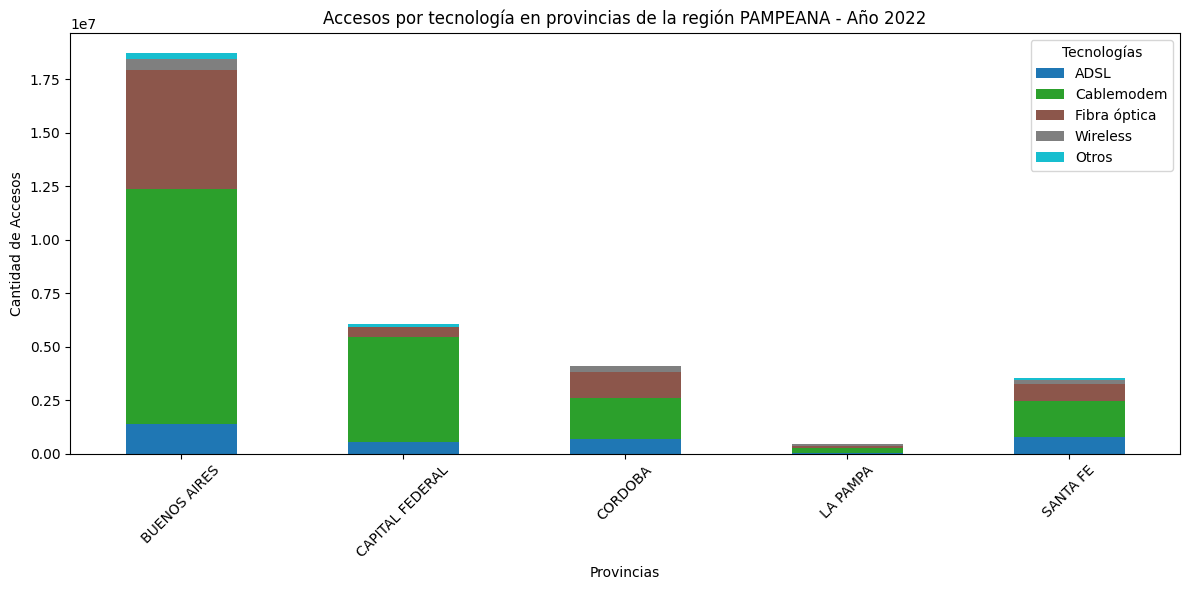

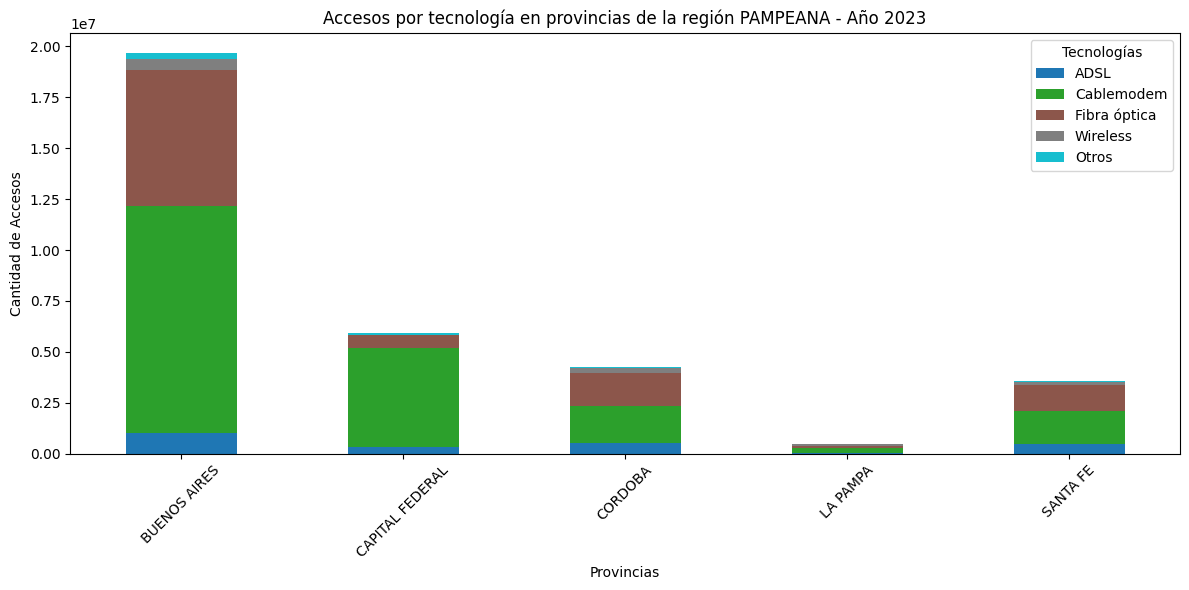

In [ ]:
años = [2020, 2021, 2022, 2023]  
df = dicc_dfs_depurado['Accesos Por Tecnología']

region_seleccionada = 'PAMPEANA'  

# Crear un gráfico por cada año
for año in años:
    # Filtrar los datos por el año y la región seleccionada
    df_filtrado = df[(df['Regiones'] == region_seleccionada) & (df['Año'] == año)]
    
    # Agrupar por provincia y sumar los valores de las tecnologías
    df_agrupado = df_filtrado.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
    
    # Crear el gráfico de barras apiladas
    df_agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
    plt.title(f"Accesos por tecnología en provincias de la región {region_seleccionada} - Año {año}")
    plt.ylabel("Cantidad de Accesos")
    plt.xlabel("Provincias")
    plt.legend(title="Tecnologías")
    plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
    plt.tight_layout()  # Ajustar el diseño para evitar etiquetas cortadas
    
    # Mostrar el gráfico
    plt.show()

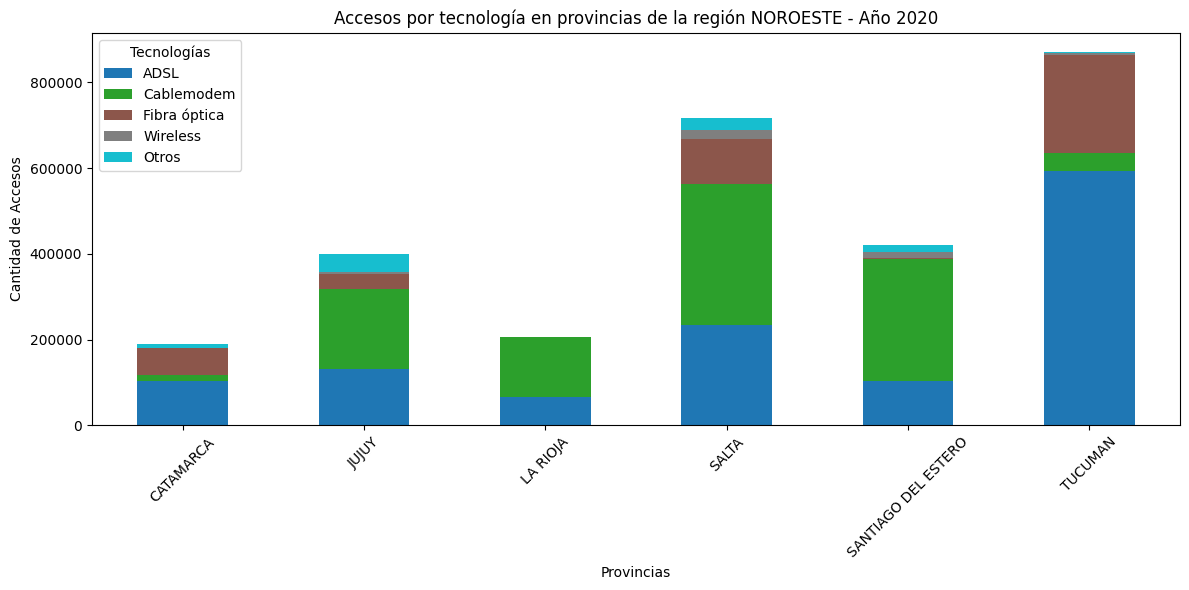

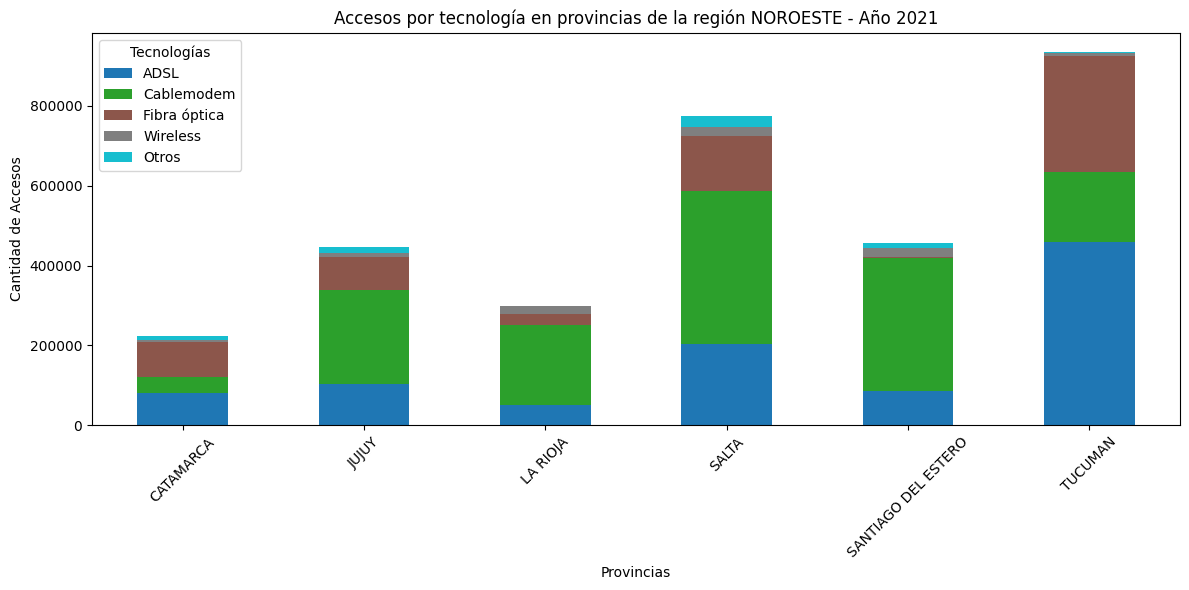

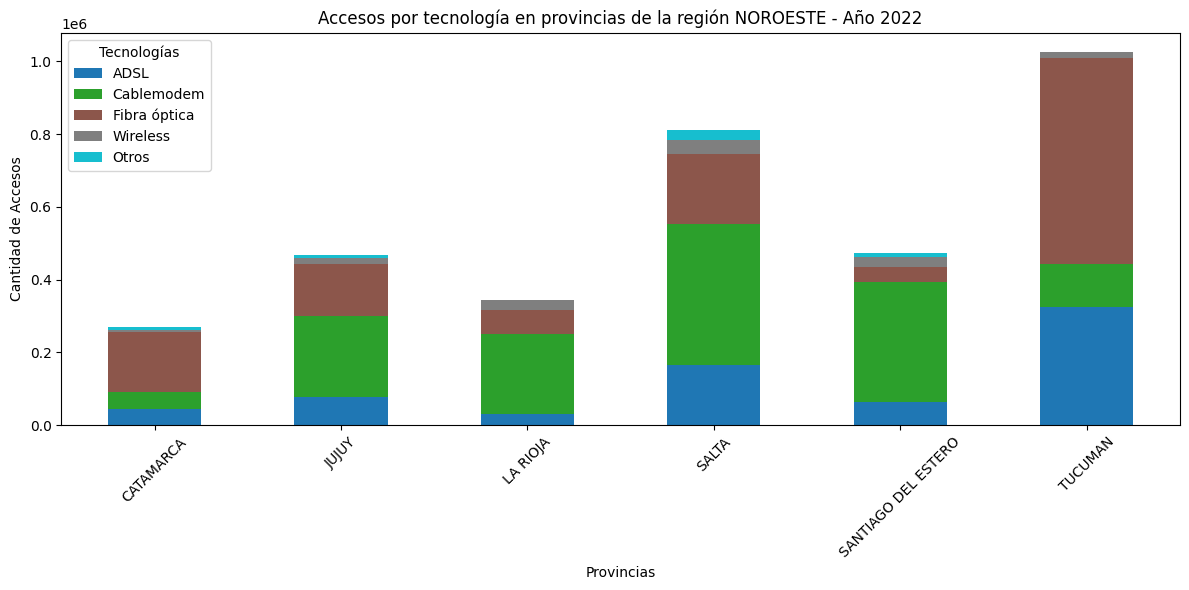

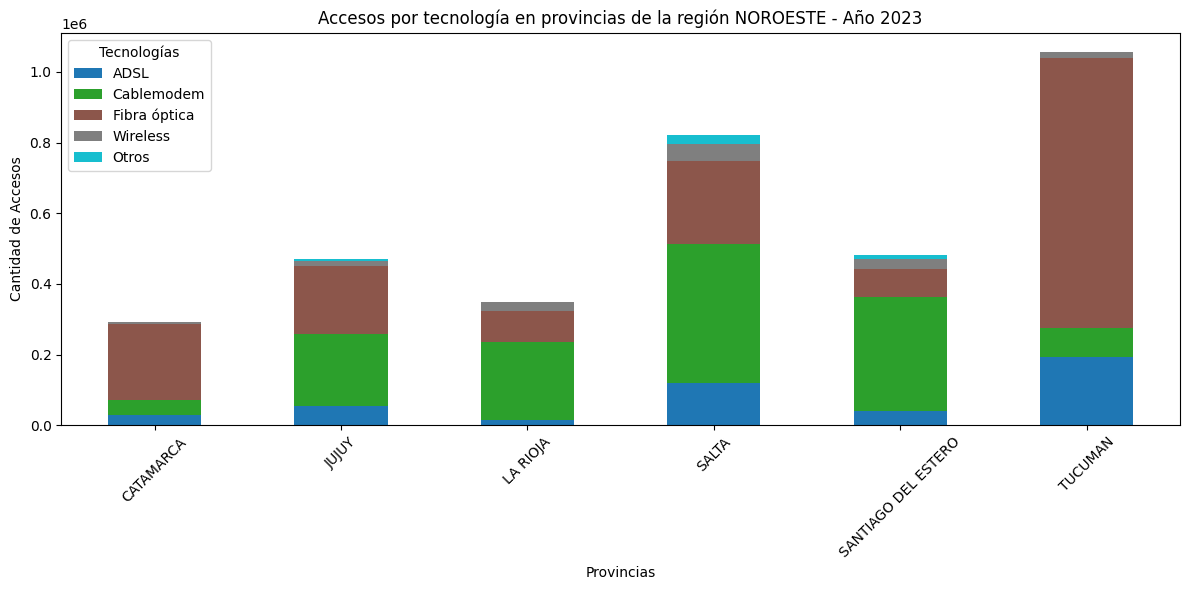

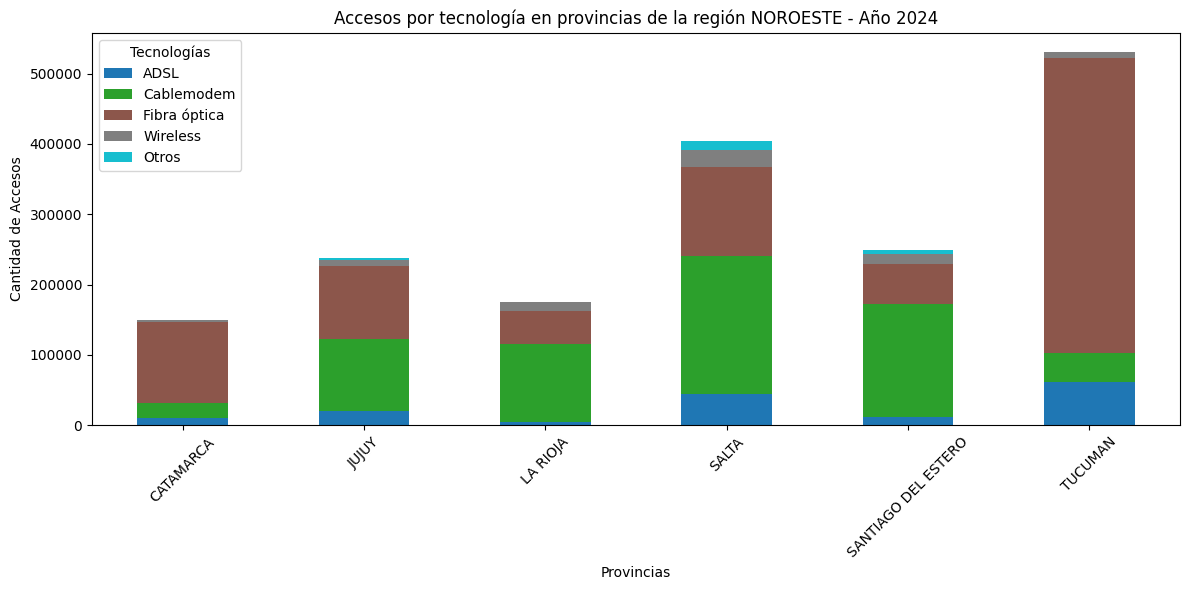

In [113]:
# veamos ahora la region Noroeste
años = [2020, 2021, 2022, 2023, 2024]  
df = dicc_dfs_depurado['Accesos Por Tecnología']


region_seleccionada = 'NOROESTE'  

# Crear un gráfico por cada año
for año in años:
    # Filtrar los datos por el año y la región seleccionada
    df_filtrado = df[(df['Regiones'] == region_seleccionada) & (df['Año'] == año)]
    
    # Agrupar por provincia y sumar los valores de las tecnologías
    df_agrupado = df_filtrado.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
    
    # Crear el gráfico de barras apiladas
    df_agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
    plt.title(f"Accesos por tecnología en provincias de la región {region_seleccionada} - Año {año}")
    plt.ylabel("Cantidad de Accesos")
    plt.xlabel("Provincias")
    plt.legend(title="Tecnologías")
    plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
    plt.tight_layout()  # Ajustar el diseño para evitar etiquetas cortadas
    
    # Mostrar el gráfico
    plt.show()

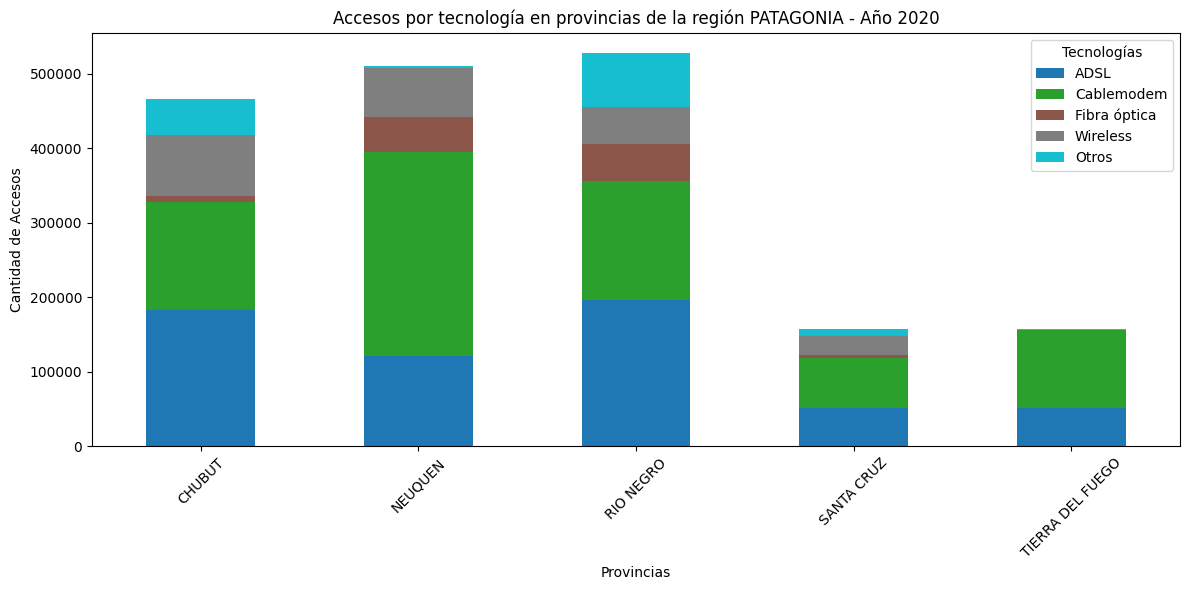

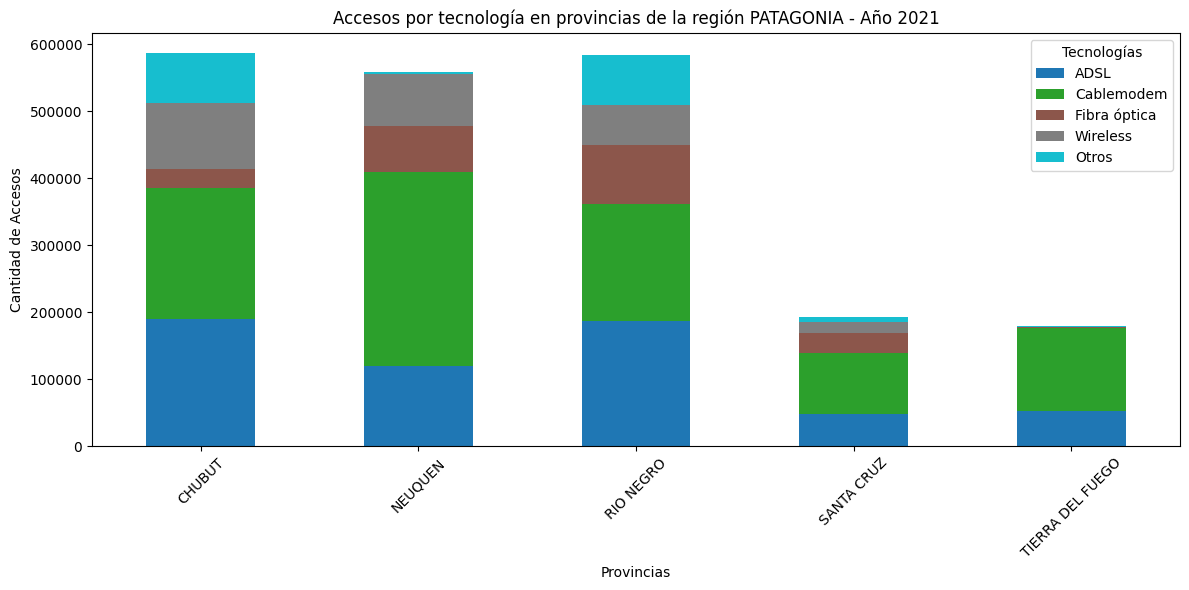

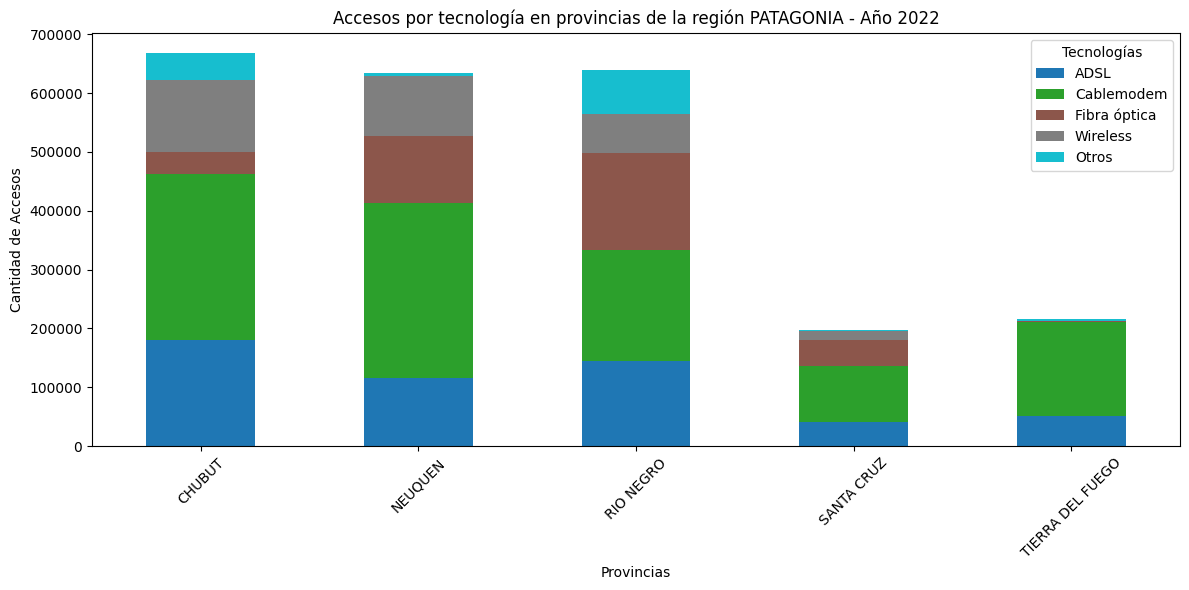

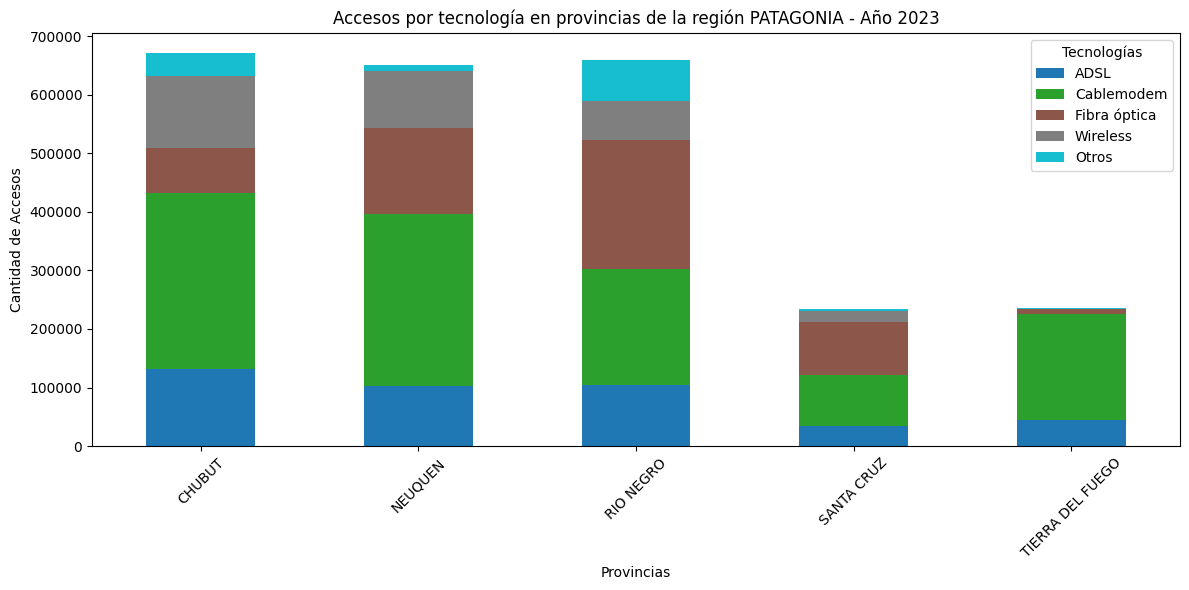

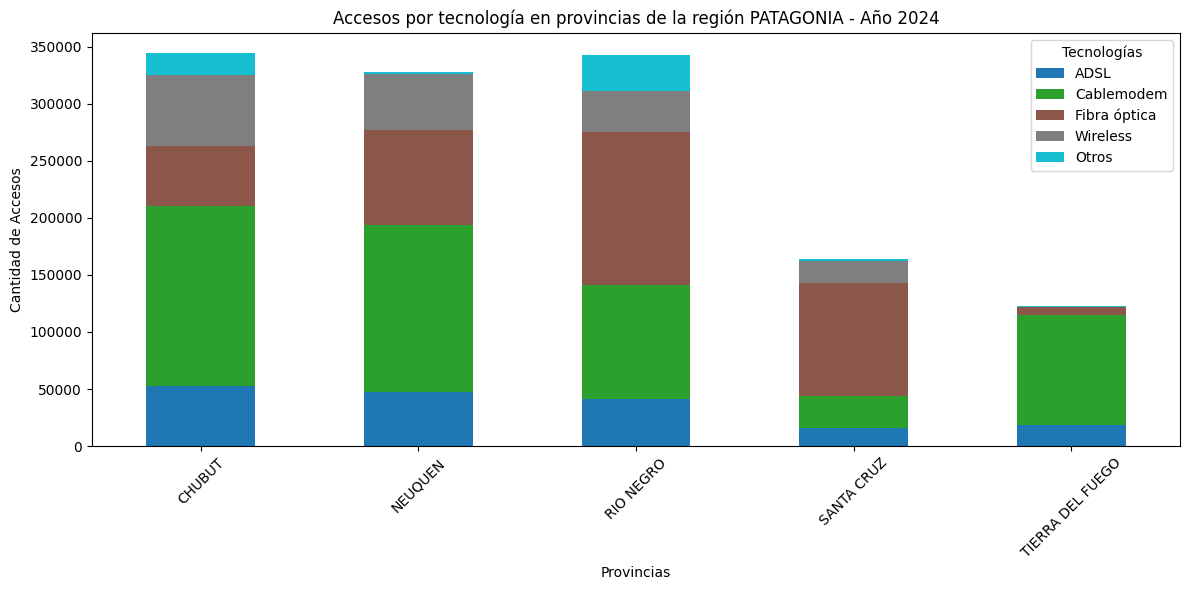

In [114]:
# veamos ahora la region Patagonia
años = [2020, 2021, 2022, 2023, 2024]  
df = dicc_dfs_depurado['Accesos Por Tecnología']


region_seleccionada = 'PATAGONIA'  

# Crear un gráfico por cada año
for año in años:
    # Filtrar los datos por el año y la región seleccionada
    df_filtrado = df[(df['Regiones'] == region_seleccionada) & (df['Año'] == año)]
    
    # Agrupar por provincia y sumar los valores de las tecnologías
    df_agrupado = df_filtrado.groupby('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
    
    # Crear el gráfico de barras apiladas
    df_agrupado.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
    plt.title(f"Accesos por tecnología en provincias de la región {region_seleccionada} - Año {año}")
    plt.ylabel("Cantidad de Accesos")
    plt.xlabel("Provincias")
    plt.legend(title="Tecnologías")
    plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
    plt.tight_layout()  # Ajustar el diseño para evitar etiquetas cortadas
    
    # Mostrar el gráfico
    plt.show()

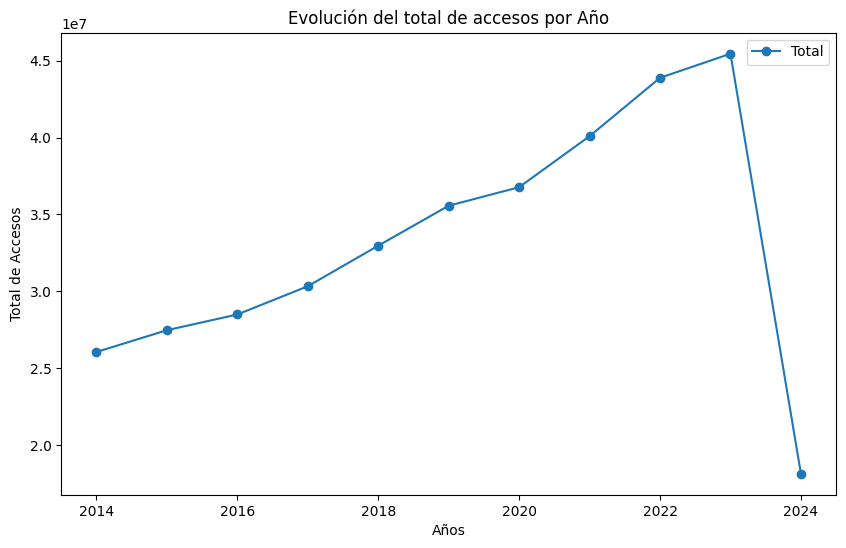

In [105]:
# veamos la evolución anual del total de accesos sin importar la tecnologia
df = dicc_dfs_depurado['Accesos Por Tecnología'] 
df_grouped = df.groupby(['Año']).sum().reset_index()
df_grouped.plot(x='Año', y='Total', kind='line', marker='o', figsize=(10, 6))
plt.title("Evolución del total de accesos por Año")
plt.ylabel("Total de Accesos")
plt.xlabel("Años")
plt.show()

**CONCLUSIONES PRELIMINARES**

El análisis de estos gráficos evidencia cómo la fibra óptica se ha convertido en la tecnología predominante en el acceso a internet, desplazando gradualmente al ADSL, que tiende a desaparecer. Este cambio responde a las ventajas que ofrece la fibra óptica, como mayores velocidades y estabilidad, en comparación con las limitaciones del ADSL, basado en líneas de cobre. Entre 2022 y 2023, la adopción de fibra óptica creció significativamente en provincias del norte y del sur del país, marcando un cambio clave en la infraestructura tecnológica.

Los accesos totales a internet han crecido de manera constante e ininterrumpida a lo largo de los años, en lo que probablemente influye el aumento de usuarios de dispositivos móviles que requieren infraestructura robusta para operar eficientemente. Este crecimiento ha sido apoyado por la expansión de la fibra óptica, que facilita la conectividad de redes móviles y de banda ancha fija.

En contraste, tecnologías como el cablemódem han mantenido su relevancia, aunque con una ligera disminución en algunas áreas, mientras que el ADSL, al depender de infraestructuras más antiguas y limitadas como las líneas de cobre, está en proceso de desaparición, reflejando una tendencia observada a nivel global.

De cara al futuro, la llegada del 5G promete llevar las telecomunicaciones a un nivel superior, con la capacidad de ofrecer velocidades aún mayores y reducir la latencia, lo que beneficiará tanto a los usuarios móviles como a diversas industrias. En este contexto, el gobierno nacional está actualmente en tratativas con empresas internacionales para llevar a cabo inversiones estratégicas que impulsen la implementación de esta tecnología en el país.

En resumen, los gráficos reflejan una evolución clara hacia tecnologías más modernas, con la fibra óptica liderando este cambio, apoyando un crecimiento sostenido de la conectividad y sentando las bases para los avances futuros, como el despliegue del 5G.

